In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scipy.io as scio
import os
import tqdm
import seaborn as sns
import matplotlib
from tqdm import trange
import pandas as pd
import itertools
from sklearn.cluster import KMeans
import matplotlib.image as mpimg
from scipy.signal import find_peaks, peak_prominences
import sys
sys.path.append("..")
from sklearn.cluster import KMeans
from overt_reading_process import HS_block_erps
#输出当前路径
import os,sys
from matplotlib.colors import Normalize
import matplotlib as mpl
import matplotlib.colors as mcolors
from matplotlib.colors import BoundaryNorm, ListedColormap
from scipy import stats
from matplotlib_venn import venn3
from sklearn.metrics import silhouette_score
from statannotations.Annotator import Annotator
print(os.getcwd())
cwd = os.getcwd()
# subjects = [68,69,75,79,82]
matplotlib.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.unicode_minus'] = False 

subjects = [68,69,75,79,82,83,84,85,86]

path = "/root/DATA/HS_DATA/Blocked_data"



/root/project/reading/fig_plot


In [2]:
subjects = [68,69,75,79,82,83,84,85,86]

path = "/root/DATA/HS_DATA/Blocked_data"
# load sig elecs
sig_elecs_HS_lists = {}
for HS in subjects:
    n_std = 5
    
    subject = f"HS{HS}"
    sig_elecs_HS_lists[subject] =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs{n_std}.npy",allow_pickle=True).item()
# load warped elecs positions
xy_all = {}
for HS in subjects:
    subject = f"HS{HS}"

    xy_all[subject] = scio.loadmat(path +"/elecs/All_elecs/"+ subject + "_warped_elec_pos2D.mat")['elecmatrix']
# load erps
HS_BLOCK = {}
for subject in subjects:
   HS_DATA = HS_block_erps.HS_block_process(subject,path)
   HS_BLOCK[f"HS{subject}"] = HS_DATA.get_HSblock()

task_word = HS_block_erps.get_task_word()
# load HS elec information
HS_elec_list = HS_block_erps.get_HS_elec(subjects=subjects,sig_elecs_HS_lists=sig_elecs_HS_lists,task_list=["cue"])

68
69
75
79
82
83
84
85
86


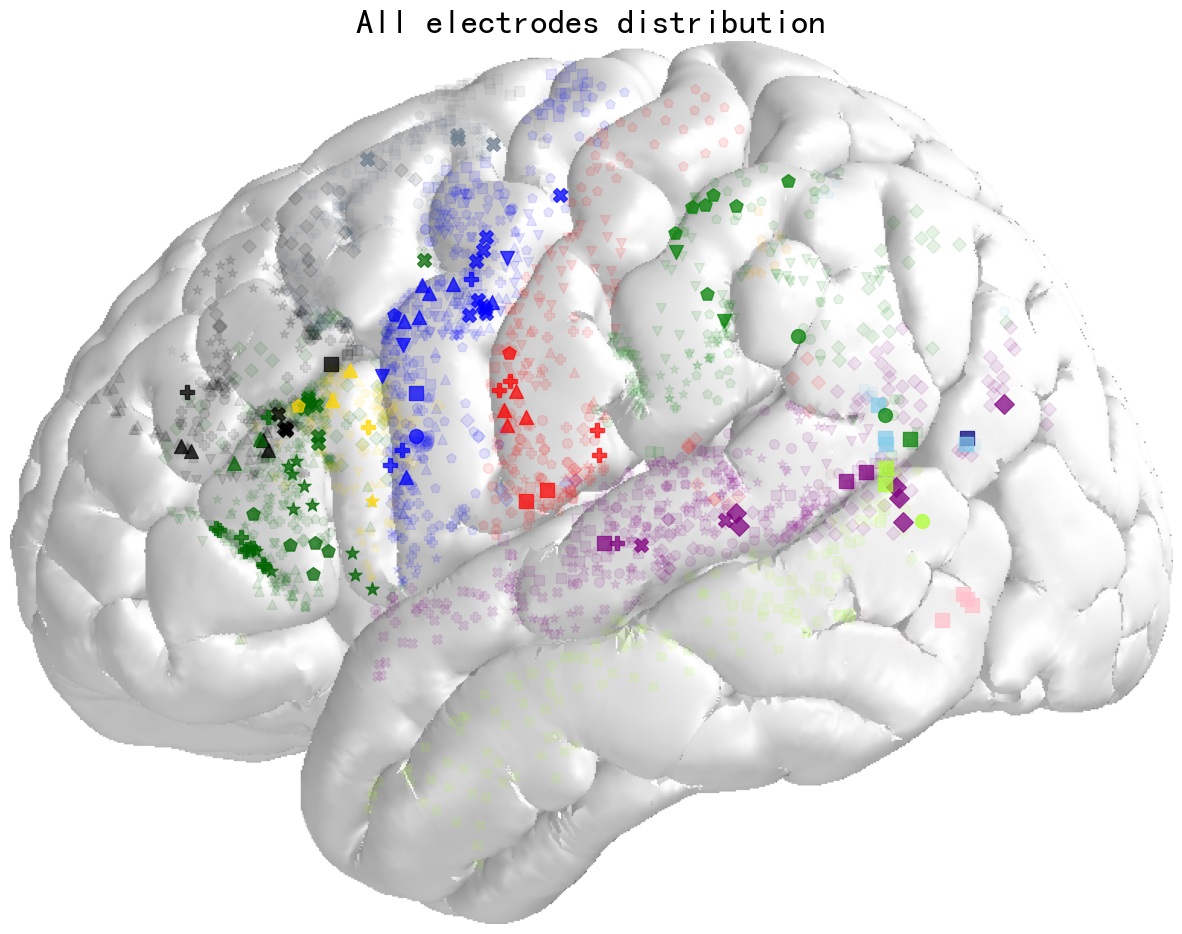

In [ ]:
subjects = [68,69,75,79,82,83,84,85,86]

path = "/root/DATA/HS_DATA/Blocked_data"
sig_elecs_HS_lists = {}
for HS in subjects:
    n_std = 5
    
    subject = f"HS{HS}"
    sig_elecs_HS_lists[subject] =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs{n_std}.npy",allow_pickle=True).item()
xy_all = {}
for HS in subjects:
    subject = f"HS{HS}"

    xy_all[subject] = scio.loadmat(path +"/elecs/All_elecs/"+ subject + "_warped_elec_pos2D.mat")['elecmatrix']
#for subject in subjects:
#    HS_DATA = HS_block_erps.HS_block_process(subject,path)
#    HS_BLOCK[f"HS{subject}"] = HS_DATA.get_HSblock()

#task_word = HS_block_erps.get_task_word()
#HS_elec_list = HS_block_erps.get_HS_elec(subjects=subjects,sig_elecs_HS_lists=sig_elecs_HS_lists,task_list=["cue"])
subjects = [68,69,75,79,82,83,84,85,86]
marker_type = {}
marker_type["68"] = "D"
marker_type["69"] = "*"
marker_type["75"] = "s"
marker_type["79"] = "P"
marker_type["82"] = "o"
marker_type["83"] = "v"
marker_type["84"] = "^"
marker_type["85"] = "X"
marker_type["86"] = "p"
color_set_region = {'superiorfrontal': 'grey',
             'superiortemporal': 'purple',
             'inferiorparietal': 'skyblue',
             'rostralmiddlefrontal': 'black',
             'parstriangularis': 'darkgreen',
             'superiorparietal': 'orange',
             'postcentral': 'red',
             'parsopercularis': 'gold',
             'middletemporal': 'greenyellow',
             'inferiortemporal': 'pink',
             'parsorbitalis': 'olive',
             'supramarginal': 'green',
             'lateraloccipital': 'navy',
             'bankssts': 'rosybrown',
             'precentral': 'blue',
             'caudalmiddlefrontal': 'slategrey'}
from matplotlib import cm
import matplotlib as mpl
from matplotlib.cm import ScalarMappable

img = mpimg.imread(path +"/elecs/Brain2D/MNI152_brain2D.png")
# img = np.load(path+"/elecs/Brain2D/MNI152_brain2D.png.npy")

fig, ax = plt.subplots(figsize=(15,15))

ax.imshow(img)

x_coords, y_coords = [],[]
values = []
values_2 = []
marker= []
region_all = []
for i,subject in enumerate(subjects):
    x_coords, y_coords = [],[]
    values = []
    values_2 = []
    marker= []
    
    HS = str(subject)
    print(HS)
    #xy = scio.loadmat(path +f"/elecs/All_elecs/HS{HS}_warped_elec_pos2D.mat")['elecmatrix']
    xy = xy_all[f"HS{HS}"]
    anatomy = scio.loadmat(path+f"/elecs/All_elecs/HS{HS}_elecs_all_warped.mat")['anatomy']
    for elec in range(256):
        elec = int(elec)
        x_coords.append(xy[elec][0])
        y_coords.append(xy[elec][1])
        
        
        flag = 0
        color = color_set_region[anatomy[elec][3][0]]
        marker.append(marker_type[HS])
        region_all.append(anatomy[elec][3][0])
        ax.scatter(x_coords[elec], y_coords[elec],c=color,alpha = 0.1,s=50,marker=marker[elec])
x_coords, y_coords = [],[]
values = []
values_2 = []
marker= []
region = []
for i,img_temp in enumerate(HS_elec_list):
    
    HS,elec = HS_elec_list[i].split("_")
    #xy = scio.loadmat(path +f"/elecs/All_elecs/HS{HS}_warped_elec_pos2D.mat")['elecmatrix']
    xy = xy_all[f"HS{HS}"]
    anatomy = scio.loadmat(path+f"/elecs/All_elecs/HS{HS}_elecs_all_warped.mat")['anatomy']
    elec = int(elec)
    x_coords.append(xy[elec][0])
    y_coords.append(xy[elec][1])
    
    
    flag = 0
    color = color_set_region[anatomy[elec][3][0]]
    marker.append(marker_type[HS])
    region.append(anatomy[elec][3][0])
    ax.scatter(x_coords[i], y_coords[i],c=color,alpha = 0.7,s=100,marker=marker[i])
#加上color bar
# im = plt.scatter(x_coords, y_coords, c=values_2, cmap='brg', alpha = 0.7,s=25*np.array(values),marker=marker)
# for i in range(len(x_coords)):
#     ax.scatter(x_coords[i], y_coords[i],c='k',alpha = 0.7,s=100,marker=marker[i])
ax.grid('off') 
ax.axis('off')

ax.set_xticks([])
ax.set_yticks([])

ax.set_title("All electrodes distribution",size=25)

plt.savefig("../figures/fig_1_elec_distri.pdf",dpi=1200)

In [4]:
len(HS_elec_list)

128

Text(0.5, 1.0, 'significant electrodes distribution')

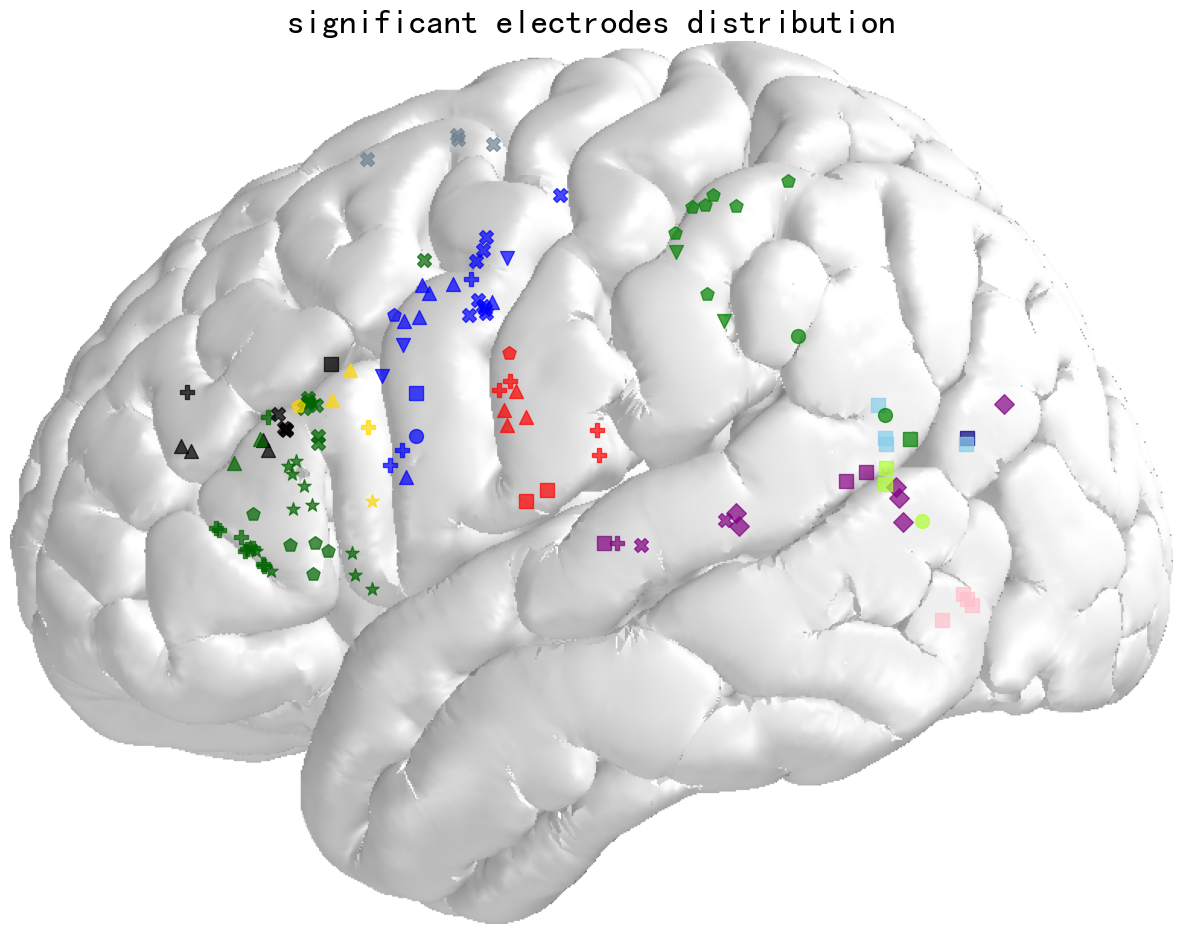

In [6]:
subjects = [68,69,75,79,82,83,84,85,86]

color_set_region = {'superiorfrontal': 'grey',
             'superiortemporal': 'purple',
             'inferiorparietal': 'skyblue',
             'rostralmiddlefrontal': 'black',
             'parstriangularis': 'darkgreen',
             'superiorparietal': 'orange',
             'postcentral': 'red',
             'parsopercularis': 'gold',
             'middletemporal': 'greenyellow',
             'inferiortemporal': 'pink',
             'parsorbitalis': 'olive',
             'supramarginal': 'green',
             'lateraloccipital': 'navy',
             'bankssts': 'rosybrown',
             'precentral': 'blue',
             'caudalmiddlefrontal': 'slategrey'}
from matplotlib import cm
import matplotlib as mpl
from matplotlib.cm import ScalarMappable

img = mpimg.imread(path +"/elecs/Brain2D/MNI152_brain2D.png")
# img = np.load(path+"/elecs/Brain2D/MNI152_brain2D.png.npy")

fig, ax = plt.subplots(figsize=(15,15))

ax.imshow(img)

x_coords, y_coords = [],[]
values = []
values_2 = []
marker= []
region = []
for i,img_temp in enumerate(HS_elec_list):
    
    HS,elec = HS_elec_list[i].split("_")
    #xy = scio.loadmat(path +f"/elecs/All_elecs/HS{HS}_warped_elec_pos2D.mat")['elecmatrix']
    xy = xy_all[f"HS{HS}"]
    anatomy = scio.loadmat(path+f"/elecs/All_elecs/HS{HS}_elecs_all_warped.mat")['anatomy']
    elec = int(elec)
    x_coords.append(xy[elec][0])
    y_coords.append(xy[elec][1])
    
    
    flag = 0
    color = color_set_region[anatomy[elec][3][0]]
    marker.append(marker_type[HS])
    region.append(anatomy[elec][3][0])
    ax.scatter(x_coords[i], y_coords[i],c=color,alpha = 0.7,s=100,marker=marker[i])

#加上color bar
# im = plt.scatter(x_coords, y_coords, c=values_2, cmap='brg', alpha = 0.7,s=25*np.array(values),marker=marker)
# for i in range(len(x_coords)):
#     ax.scatter(x_coords[i], y_coords[i],c='k',alpha = 0.7,s=100,marker=marker[i])
ax.grid('off') 
ax.axis('off')

ax.set_xticks([])
ax.set_yticks([])

ax.set_title("significant electrodes distribution",size=25)



Text(0, 0.5, 'significant electrodes numbers')

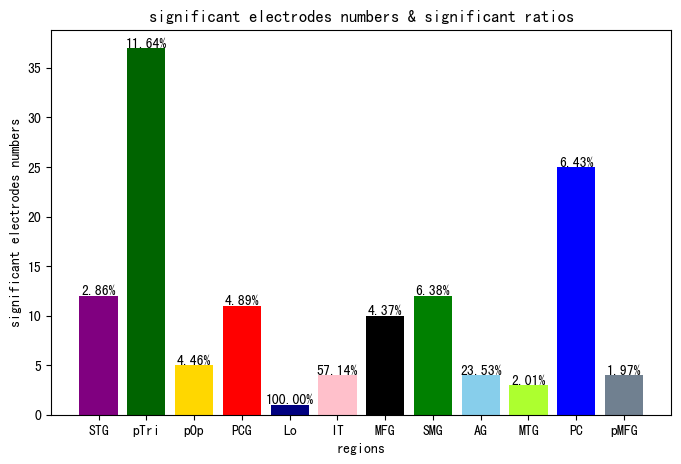

In [7]:
x = [3,3,3,2,2,2,1,1,1,0,0,0]
y = [1,2,3,1,2,3,1,2,3,1,2,3]
i = 0
region_abbr = {'superiorfrontal': 'SFG',
             'superiortemporal': 'STG',
             'inferiorparietal': 'AG',
             'rostralmiddlefrontal': 'MFG',
             'parstriangularis': 'pTri',
             'superiorparietal': 'SPL',
             'postcentral': 'PCG',
             'parsopercularis': 'pOp',
             'middletemporal': 'MTG',
             'inferiortemporal': 'IT',
             'supramarginal': 'SMG',
             'lateraloccipital': 'Lo',
             'precentral': 'PC',
             'caudalmiddlefrontal': 'pMFG'}

color_set_region = {'superiorfrontal': 'grey',
             'superiortemporal': 'purple',
             'inferiorparietal': 'skyblue',
             'rostralmiddlefrontal': 'black',
             'parstriangularis': 'darkgreen',
             'superiorparietal': 'orange',
             'postcentral': 'red',
             'parsopercularis': 'gold',
             'middletemporal': 'greenyellow',
             'inferiortemporal': 'pink',
             'parsorbitalis': 'olive',
             'supramarginal': 'green',
             'lateraloccipital': 'navy',
             'bankssts': 'rosybrown',
             'precentral': 'blue',
             'caudalmiddlefrontal': 'slategrey'}

from collections import Counter


plt.figure(figsize=(8, 5))
region_all_fre = Counter(region_all)
region_frequency = Counter(region)
values = []
names = []
rate = []
all_values = []
colors = []

for region_name in region_frequency:
    names.append(region_abbr[region_name])
    values.append(region_frequency[region_name])
    rate.append(region_frequency[region_name]/region_all_fre[region_name])
    all_values.append(region_all_fre[region_name])
    colors.append(color_set_region[region_name])

# 创建柱状图
plt.bar(names, values,color=colors)
for i, v in enumerate(values):
    plt.text(i, v + 0.1, f"{100*rate[i]:.2f}%", ha='center')
# 添加标题和标签
plt.title('significant electrodes numbers & significant ratios')
plt.xlabel('regions')
plt.ylabel('significant electrodes numbers')


In [45]:
region_frequency

Counter({'parstriangularis': 103,
         'precentral': 54,
         'superiortemporal': 38,
         'postcentral': 26,
         'supramarginal': 24,
         'rostralmiddlefrontal': 20,
         'caudalmiddlefrontal': 18,
         'parsopercularis': 17,
         'middletemporal': 15,
         'inferiorparietal': 7,
         'inferiortemporal': 5,
         'superiorfrontal': 3,
         'lateraloccipital': 1})

(0.0, 5.0, 0.0, 4.0)

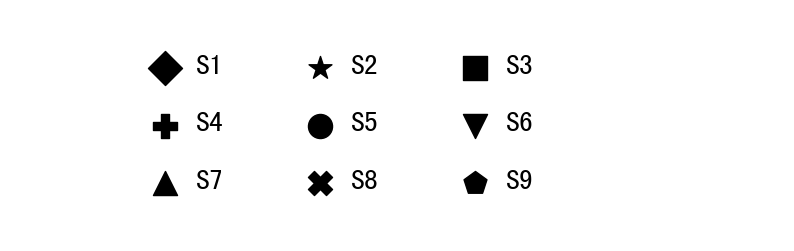

In [61]:
fig,ax = plt.subplots(figsize=(10,3))


y = [3,3,3,2,2,2,1,1,1]
x = [1,2,3,1,2,3,1,2,3]
i = 0

for key in marker_type:
    ax.scatter(x[i], y[i], c='k',alpha = 1,s=300,marker=marker_type[key])
    ax.text(x[i]+0.2, y[i]-0.1, s=f"S{i+1}",size=20)
    i+=1
plt.xlim([0,5])
plt.ylim([0,4])
# plt.grid('off') 
plt.axis('off')

# 不同condition下的显著程度

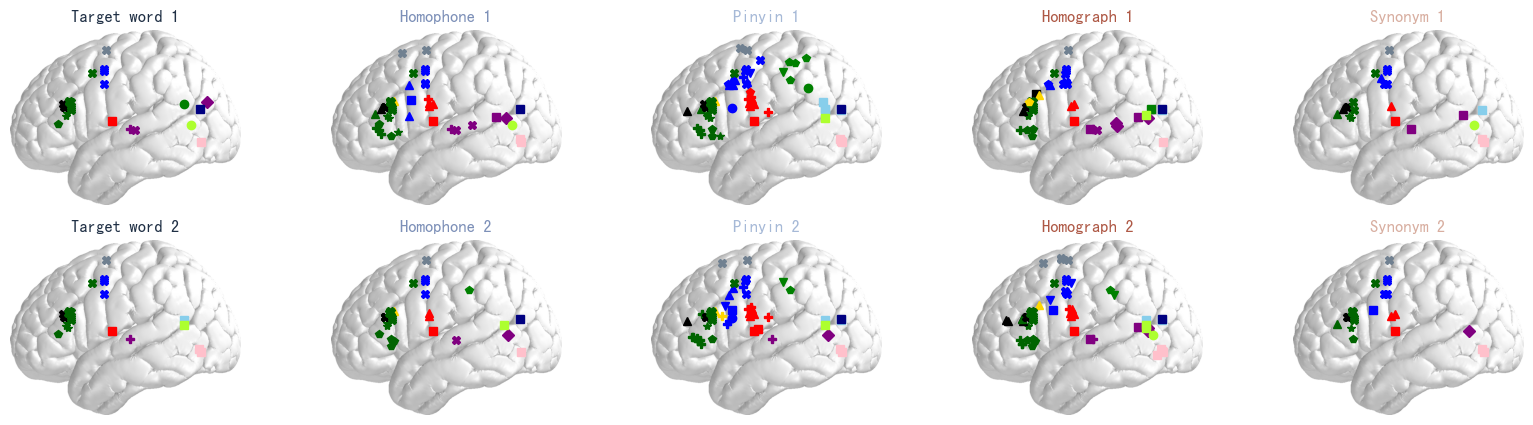

In [8]:
img = mpimg.imread(path +"/elecs/Brain2D/MNI152_brain2D.png")
check_list_2 = ['树叶','数页','shù yè','对十','绿草']
check_list_1 = ['功课','宫客','gōng kè','力果','作业']
name_list = ["Target word","Homophone","Pinyin","Homograph","Synonym"]
color_list = [(32/255,48/255,69/255),(125/255,144/255,184/255),(166/255,185/255,215/255),(174/255,88/255,69/255),(216/255,174/255,160/255)]
fig, axes = plt.subplots(2,5,figsize=(20,5))
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
numbers_of_word = {}
color_dict = {}
for pic,word in enumerate(check_list_1):
# img = np.load(path+"/elecs/Brain2D/MNI152_brain2D.png.npy")
    ax = axes[0,pic]
    ax.imshow(img)
    numbers_of_word[word] = 0
    color_dict[word] = color_list[pic]
    for HS in subjects:
        n_std = 5
        subject = f"HS{HS}"
        xy = scio.loadmat(path +"/elecs/All_elecs/"+ subject + "_warped_elec_pos2D.mat")['elecmatrix']
        n_chans = 256 if xy.shape[0] >= 256 else 128
        
        all_sig_elecs =np.load(path +f"/elecs_2/sig_elecs/HS{HS}_sig_elecs{n_std}.npy",allow_pickle=True).item()
        anatomy = scio.loadmat(path+f"/elecs/All_elecs/HS{HS}_elecs_all_warped.mat")['anatomy']

        z = plt.get_cmap("coolwarm")
        #plt.title("HS_"+str(HS)+": "+task+" "+str(time))
        
        task = "cue"
        for i in range(n_chans):
            if i in all_sig_elecs[check_list_1[pic]+ " "+task]:
                numbers_of_word[word] += 1
                color = color_set_region[anatomy[i][3][0]]
                    #对皮尔森相似度正的为红色，负的为蓝色,不显著的为绿色, 不显著的电极为灰色
                ax.plot(xy[i][0], xy[i][1],color = color,alpha =1,marker=marker_type[str(HS)])
        ax.grid('off') 
        ax.axis('off')
        ax.set_title(name_list[pic]+" 1",color = color_list[pic])   
for pic,word in enumerate(check_list_2):
# img = np.load(path+"/elecs/Brain2D/MNI152_brain2D.png.npy")
    ax = axes[1,pic]
    ax.imshow(img)
    numbers_of_word[word] = 0
    color_dict[word] = color_list[pic]
    for HS in subjects:
        n_std = 5
        subject = f"HS{HS}"
        xy = scio.loadmat(path +"/elecs/All_elecs/"+ subject + "_warped_elec_pos2D.mat")['elecmatrix']
        n_chans = 256 if xy.shape[0] >= 256 else 128
        
        all_sig_elecs =np.load(path +f"/elecs_2/sig_elecs/HS{HS}_sig_elecs{n_std}.npy",allow_pickle=True).item()
        anatomy = scio.loadmat(path+f"/elecs/All_elecs/HS{HS}_elecs_all_warped.mat")['anatomy']

        z = plt.get_cmap("coolwarm")
        #plt.title("HS_"+str(HS)+": "+task+" "+str(time))
        
        task = "cue"
        for i in range(n_chans):
            if i in all_sig_elecs[check_list_2[pic]+ " "+task]:
                color = color_set_region[anatomy[i][3][0]]
                numbers_of_word[word] += 1

                    #对皮尔森相似度正的为红色，负的为蓝色,不显著的为绿色, 不显著的电极为灰色
                ax.plot(xy[i][0], xy[i][1], marker=marker_type[str(HS)],color = color,alpha =1)
        ax.grid('off') 
        ax.axis('off')
        ax.set_title(name_list[pic]+" 2",color = color_list[pic])   


Text(0, 0.5, 'number of significant electrodes')

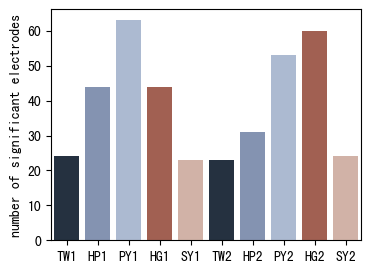

In [9]:
color_list = [(32/255,48/255,69/255),(125/255,144/255,184/255),(166/255,185/255,215/255),(174/255,88/255,69/255),(216/255,174/255,160/255)]
plt.figure(figsize=(4, 3))
sns.barplot(x = ["TW1","HP1","PY1","HG1","SY1","TW2","HP2","PY2","HG2","SY2"],y=list(numbers_of_word.values()),palette=color_list)
plt.ylabel('number of significant electrodes',fontsize = 10)

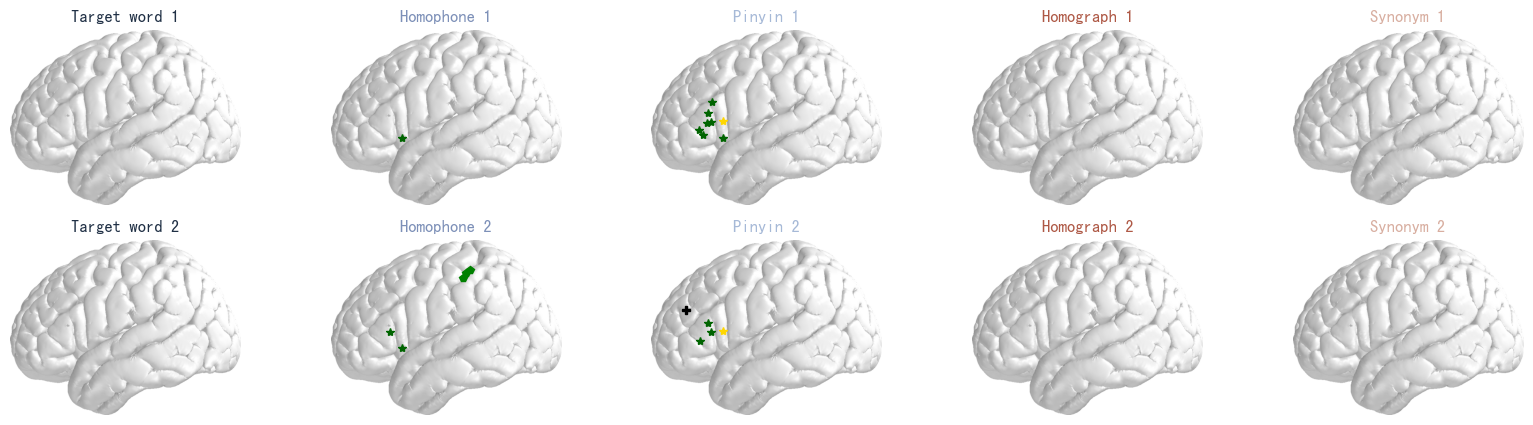

In [96]:
img = mpimg.imread(path +"/elecs/Brain2D/MNI152_brain2D.png")
check_list_2 = ['树叶','数页','shù yè','对十','绿草']
check_list_1 = ['功课','宫客','gōng kè','力果','作业']
name_list = ["Target word","Homophone","Pinyin","Homograph","Synonym"]
color_list = [(32/255,48/255,69/255),(125/255,144/255,184/255),(166/255,185/255,215/255),(174/255,88/255,69/255),(216/255,174/255,160/255)]
fig, axes = plt.subplots(2,5,figsize=(20,5))
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
numbers_of_word = {}
color_dict = {}
for pic,word in enumerate(check_list_1):
    numbers_of_word[word] = []
# img = np.load(path+"/elecs/Brain2D/MNI152_brain2D.png.npy")
    ax = axes[0,pic]
    ax.imshow(img)
    #numbers_of_word[word] = 0
    color_dict[word] = color_list[pic]
    for HS in subjects:
        n_std = 5
        subject = f"HS{HS}"
        xy = scio.loadmat(path +"/elecs/All_elecs/"+ subject + "_warped_elec_pos2D.mat")['elecmatrix']
        n_chans = 256 if xy.shape[0] >= 256 else 128
        
        all_sig_elecs =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs{n_std}.npy",allow_pickle=True).item()
        all_sig_elecs_old =np.load(path +f"/elecs_2/sig_elecs/HS{HS}_sig_elecs{n_std}.npy",allow_pickle=True).item()
        anatomy = scio.loadmat(path+f"/elecs/All_elecs/HS{HS}_elecs_all_warped.mat")['anatomy']

        z = plt.get_cmap("coolwarm")
        #plt.title("HS_"+str(HS)+": "+task+" "+str(time))
        
        task = "cue"
        for i in range(n_chans):
            if i in all_sig_elecs[check_list_1[pic]+ " "+task] and i not in all_sig_elecs_old[check_list_1[pic]+ " "+task]:
                #numbers_of_word[word] += 1
                numbers_of_word[word].append(f"{HS}_{i}")
                color = color_set_region[anatomy[i][3][0]]
                    #对皮尔森相似度正的为红色，负的为蓝色,不显著的为绿色, 不显著的电极为灰色
                ax.plot(xy[i][0], xy[i][1],color = color,alpha =1,marker=marker_type[str(HS)])
        ax.grid('off') 
        ax.axis('off')
        ax.set_title(name_list[pic]+" 1",color = color_list[pic])   
for pic,word in enumerate(check_list_2):
    numbers_of_word[word] = []
# img = np.load(path+"/elecs/Brain2D/MNI152_brain2D.png.npy")
    ax = axes[1,pic]
    ax.imshow(img)
    #
    # numbers_of_word[word] = 0
    color_dict[word] = color_list[pic]
    for HS in subjects:
        n_std = 5
        subject = f"HS{HS}"
        xy = scio.loadmat(path +"/elecs/All_elecs/"+ subject + "_warped_elec_pos2D.mat")['elecmatrix']
        n_chans = 256 if xy.shape[0] >= 256 else 128
        
        all_sig_elecs =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs{n_std}.npy",allow_pickle=True).item()
        all_sig_elecs_old =np.load(path +f"/elecs_2/sig_elecs/HS{HS}_sig_elecs{n_std}.npy",allow_pickle=True).item()
        anatomy = scio.loadmat(path+f"/elecs/All_elecs/HS{HS}_elecs_all_warped.mat")['anatomy']

        z = plt.get_cmap("coolwarm")
        #plt.title("HS_"+str(HS)+": "+task+" "+str(time))
        
        task = "cue"
        for i in range(n_chans):
            if i in all_sig_elecs[check_list_2[pic]+ " "+task] and i not in all_sig_elecs_old[check_list_2[pic]+ " "+task]:
                color = color_set_region[anatomy[i][3][0]]
                #numbers_of_word[word] += 1
                numbers_of_word[word].append(f"{HS}_{i}")
                    #对皮尔森相似度正的为红色，负的为蓝色,不显著的为绿色, 不显著的电极为灰色
                ax.plot(xy[i][0], xy[i][1], marker=marker_type[str(HS)],color = color,alpha =1)
        ax.grid('off') 
        ax.axis('off')
        ax.set_title(name_list[pic]+" 2",color = color_list[pic])   


## 合并


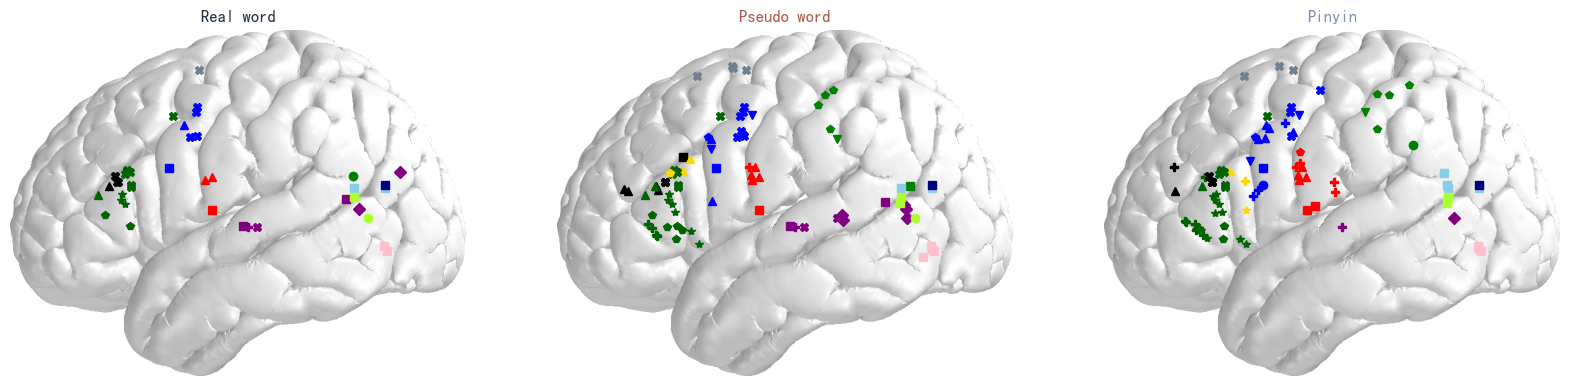

In [7]:
img = mpimg.imread(path +"/elecs/Brain2D/MNI152_brain2D.png")
check_list_2 = ['树叶','数页','shù yè','对十','绿草']
check_list_1 = ['功课','宫客','gōng kè','力果','作业']
word_list = {"Real word":["树叶","功课","绿草","作业"],
             "Pseudo word":["数页","宫客","对十","力果"],
             "Pinyin":["shù yè",'gōng kè']}
name_list = ["Real word","Pseudo word","Pinyin"]
color_list = [(32/255,48/255,69/255),(174/255,88/255,69/255),(125/255,144/255,184/255),(166/255,185/255,215/255),(216/255,174/255,160/255)]
fig, axes = plt.subplots(1,3,figsize=(20,5))
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
numbers_of_word = {}
color_dict = {}
for pic,name in enumerate(name_list):
# img = np.load(path+"/elecs/Brain2D/MNI152_brain2D.png.npy")
    ax = axes[pic]
    ax.imshow(img)
    numbers_of_word[name] = []
    color_dict[name] = color_list[pic]
    for HS in subjects:
        n_std = 5
        subject = f"HS{HS}"
        xy = scio.loadmat(path +"/elecs/All_elecs/"+ subject + "_warped_elec_pos2D.mat")['elecmatrix']
        n_chans = 256 if xy.shape[0] >= 256 else 128
        
        all_sig_elecs =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs{n_std}.npy",allow_pickle=True).item()
        anatomy = scio.loadmat(path+f"/elecs/All_elecs/HS{HS}_elecs_all_warped.mat")['anatomy']

        z = plt.get_cmap("coolwarm")
        #plt.title("HS_"+str(HS)+": "+task+" "+str(time))
        
        task = "cue"
        for i in range(n_chans):
            for word in word_list[name]:

                if i in all_sig_elecs[word+" "+task]:

                    numbers_of_word[name].append(f"{HS}_{i}")
                    
                    color = color_set_region[anatomy[i][3][0]]
                        #对皮尔森相似度正的为红色，负的为蓝色,不显著的为绿色, 不显著的电极为灰色
                    ax.plot(xy[i][0], xy[i][1],color = color,alpha =1,marker=marker_type[str(HS)])
                    break
        ax.grid('off') 
        ax.axis('off')
        ax.set_title(name_list[pic],color = color_list[pic])   
plt.savefig("../figures/fig1_elec_distri_condition.pdf",dpi=1000)

## 合并但是交集

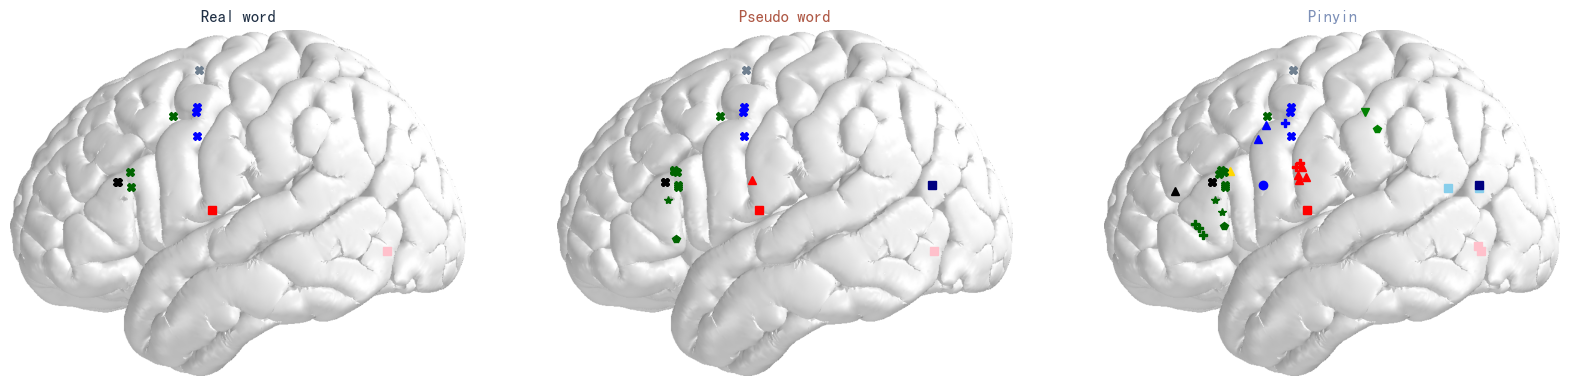

In [15]:
img = mpimg.imread(path +"/elecs/Brain2D/MNI152_brain2D.png")
check_list_2 = ['树叶','数页','shù yè','对十','绿草']
check_list_1 = ['功课','宫客','gōng kè','力果','作业']
word_list = {"Real word":["树叶","功课","绿草","作业"],
             "Pseudo word":["数页","宫客","对十","力果"],
             "Pinyin":["shù yè",'gōng kè']}
name_list = ["Real word","Pseudo word","Pinyin"]
color_list = [(32/255,48/255,69/255),(174/255,88/255,69/255),(125/255,144/255,184/255),(166/255,185/255,215/255),(216/255,174/255,160/255)]
fig, axes = plt.subplots(1,3,figsize=(20,5))
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
numbers_of_word = {}
color_dict = {}
for pic,name in enumerate(name_list):
# img = np.load(path+"/elecs/Brain2D/MNI152_brain2D.png.npy")
    ax = axes[pic]
    ax.imshow(img)
    numbers_of_word[name] = 0
    color_dict[name] = color_list[pic]
    for HS in subjects:
        n_std = 5
        subject = f"HS{HS}"
        xy = scio.loadmat(path +"/elecs/All_elecs/"+ subject + "_warped_elec_pos2D.mat")['elecmatrix']
        n_chans = 256 if xy.shape[0] >= 256 else 128
        
        all_sig_elecs =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs{n_std}.npy",allow_pickle=True).item()
        anatomy = scio.loadmat(path+f"/elecs/All_elecs/HS{HS}_elecs_all_warped.mat")['anatomy']

        z = plt.get_cmap("coolwarm")
        #plt.title("HS_"+str(HS)+": "+task+" "+str(time))
        
        task = "cue"
        for i in range(n_chans):
            flag = 0
            for word in word_list[name]:

                if i not in all_sig_elecs[word+" "+task]:
                    flag = 1
            if flag == 0:
                numbers_of_word[name] += 1
                
                color = color_set_region[anatomy[i][3][0]]
                    #对皮尔森相似度正的为红色，负的为蓝色,不显著的为绿色, 不显著的电极为灰色
                ax.plot(xy[i][0], xy[i][1],color = color,alpha =1,marker=marker_type[str(HS)])
                    
        ax.grid('off') 
        ax.axis('off')
        ax.set_title(name_list[pic],color = color_list[pic])   


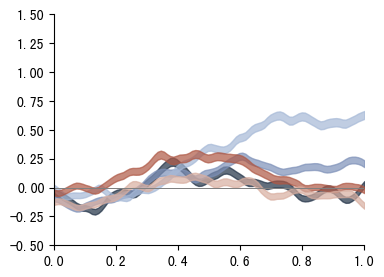

In [95]:
def nansem(a, axis=1):
    return np.nanstd(a, axis=1) / np.sqrt(a.shape[axis])

def plot_filled_sem(a, xvals, ax=None, color=None, ylim=None, alpha=0.6):
    if ax is None:
        fig, ax = plt.subplots()
    mean = np.nanmean(a, axis=1)
    sem = nansem(a, axis=1)
    #ax.axvline(0, color='gray', linewidth=0.5)
    ax.axhline(0, color='gray', linewidth=0.5)

    if color is not None:
        h = ax.fill_between(xvals, mean - sem, mean + sem, alpha=alpha, color=color)
    else:
        h = ax.fill_between(xvals, mean - sem, mean + sem, alpha=alpha, )

    if ylim is not None:
        ax.set(ylim=ylim)
    ax.set(xlim=(xvals[0], xvals[-1]))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    return h
def ERP_HS_elec_figure_region_cluster(HS_elec_list, check_list, color_list, listen=False,legend=True,y_axis=False,ax=None):
    channel_num = 256
    num_channels = 256
    ecog_freq = 100
    forward = int(0 * 400)
    backward = int(1 * 400)
    step = int(4)
    length = (forward + backward) // step
    time_duration = length / 100
    check_list_2 = ['功课','宫客','gōng kè','力果','作业']
    #xvals = np.linspace(-0.5, 0.6, 110)
    xvals = np.linspace(0, 1, int(ecog_freq * time_duration))  # 100为采样频率
    if listen:
        xvals = np.linspace(0, 2, int(ecog_freq * 2))  # 100为采样频率
    if ax == None:
        fig,ax=plt.subplots(figsize=(4,3))
    h_list = [ ]
    for k in range(len(check_list)):
        a = []
        for HS_elec in HS_elec_list:
            HS,elec = HS_elec.split('_')
            a.append(HS_BLOCK[f"HS{HS}"][check_list[k]][int(elec)][100:200])
            a.append(HS_BLOCK[f"HS{HS}"][check_list_2[k]][int(elec)][100:200])
        a = np.concatenate(a,-1)

        h = plot_filled_sem(a, xvals, ax=ax, color=color_list[k], alpha=0.7)
        h_list.append(h)

    
    ax.set_ylim(-0.5, 1.5)
    #ax.text(0.1, 0.85, f"{HS}_{elec}", transform=ax.transAxes)
    #ax.set_title(f"{HS}_{elec}")
    if legend == True:
        ax.legend(h_list,["Target word","Homophone","Pinyin","Homograph","Synonym"],loc='upper right')
    if y_axis == False:
        ax.yaxis.set_visible(False)
        ax.spines['left'].set_visible(False)
    if not listen:
        pass
        #ax.axvline(2, color='gray', linewidth=0.5)
        #ax.set(yticklabels=[0, 0.5, 1], xticklabels=[0, 2, 3.5], xticks=[0, 2, 3.5], yticks=[0, 0.5, 1])
        # ax.axvline(3.5, color='gray', linewidth=0.5)
        # ax.text(-0.4, 1.5, f"文字出现" )
        # ax.text(1.5, 1.5, f"红灯变绿灯")
        # ax.text(3.1, 1.5, f"文字消失")
    else:
        ax.axvline(1, color='gray', linewidth=0.5)
        ax.set(yticklabels=[], xticklabels=[], xticks=[0, 1])

ERP_HS_elec_figure_region_cluster(numbers_of_word["gōng kè"],check_list_1,color_list=color_list,listen=False,legend=False,y_axis=True)

In [50]:
total_HS_elec = np.ravel(list(numbers_of_word.values())[:2])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [51]:
list(numbers_of_word.values())[2]

['68_248',
 '69_11',
 '69_27',
 '69_28',
 '69_43',
 '69_60',
 '69_73',
 '69_74',
 '69_75',
 '69_76',
 '69_77',
 '69_86',
 '69_90',
 '69_121',
 '75_95',
 '75_142',
 '75_159',
 '75_160',
 '75_161',
 '75_177',
 '75_193',
 '75_208',
 '75_209',
 '75_210',
 '75_224',
 '75_225',
 '75_241',
 '79_7',
 '79_23',
 '79_24',
 '79_47',
 '79_76',
 '79_95',
 '79_107',
 '79_108',
 '79_109',
 '79_111',
 '79_123',
 '79_124',
 '79_166',
 '79_172',
 '79_181',
 '79_186',
 '79_202',
 '79_243',
 '82_6',
 '82_236',
 '83_22',
 '83_184',
 '83_223',
 '84_4',
 '84_5',
 '84_18',
 '84_20',
 '84_22',
 '84_24',
 '84_82',
 '84_83',
 '84_98',
 '84_99',
 '84_252',
 '84_253',
 '85_134',
 '85_135',
 '85_136',
 '85_137',
 '85_150',
 '85_151',
 '85_160',
 '85_192',
 '85_202',
 '85_203',
 '85_204',
 '85_216',
 '85_220',
 '85_221',
 '85_224',
 '85_241',
 '85_244',
 '85_245',
 '86_3',
 '86_4',
 '86_9',
 '86_109',
 '86_126',
 '86_195',
 '86_212',
 '86_225']

In [52]:
numbers_of_word

{'Real word': ['68_210',
  '68_227',
  '69_74',
  '69_75',
  '69_90',
  '75_95',
  '75_159',
  '75_160',
  '75_164',
  '75_193',
  '75_204',
  '75_208',
  '75_209',
  '75_224',
  '75_241',
  '79_243',
  '82_17',
  '82_96',
  '84_3',
  '84_12',
  '84_98',
  '84_99',
  '84_236',
  '85_76',
  '85_134',
  '85_135',
  '85_136',
  '85_150',
  '85_151',
  '85_202',
  '85_203',
  '85_204',
  '85_216',
  '85_220',
  '85_221',
  '85_224',
  '85_236',
  '85_244',
  '85_245',
  '85_247',
  '86_95',
  '86_109'],
 'Pseudo word': ['68_187',
  '68_203',
  '68_227',
  '68_231',
  '68_248',
  '69_60',
  '69_74',
  '69_75',
  '69_77',
  '69_90',
  '69_91',
  '75_15',
  '75_95',
  '75_131',
  '75_159',
  '75_160',
  '75_165',
  '75_193',
  '75_204',
  '75_208',
  '75_209',
  '75_210',
  '75_224',
  '75_225',
  '75_241',
  '75_242',
  '79_109',
  '79_122',
  '79_123',
  '79_124',
  '79_202',
  '79_243',
  '82_96',
  '83_40',
  '83_213',
  '83_223',
  '84_7',
  '84_12',
  '84_22',
  '84_24',
  '84_82',
  '8

# 绘制激活的venne图

In [9]:
numbers_of_word_len = {}
for word in numbers_of_word:
    numbers_of_word_len[word] = len(numbers_of_word[word])


In [10]:
numbers_of_word_len

{'Real word': 42, 'Pseudo word': 86, 'Pinyin': 88}

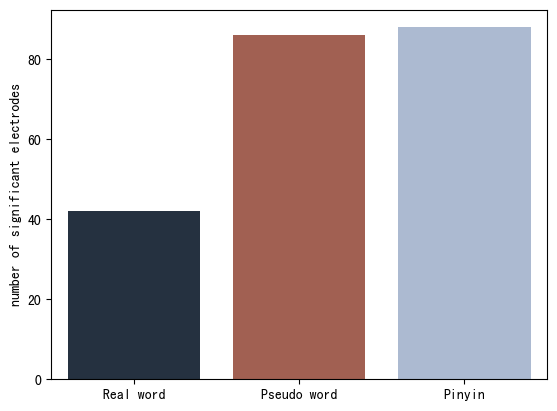

In [11]:

sns.barplot(x = list(numbers_of_word_len.keys()),y=list(numbers_of_word_len.values()),palette=[(32/255,48/255,69/255),(174/255,88/255,69/255),(166/255,185/255,215/255)])
plt.ylabel('number of significant electrodes',fontsize = 10)
plt.savefig('../figures/fig1_I.pdf',dpi=1000)

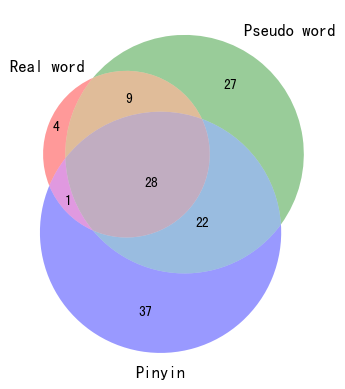

In [12]:
from matplotlib_venn import venn3
A = set(numbers_of_word['Real word'])
B = set(numbers_of_word['Pseudo word'])
C = set(numbers_of_word['Pinyin'])
venn3([A,B,C],("Real word","Pseudo word","Pinyin"))
plt.savefig('../figures/fig1_G.pdf',dpi=1000)

In [13]:
def get_color(HS_elec):
    color_set = np.array([[255,153,153],[153,204,153],[153,153,255],[255,153,30],[30,153,255],[255,30,255],[193,173,193]])
    a,b,c = 0,0,0
    if HS_elec in numbers_of_word['Real word']:
        a = 1
    if HS_elec in numbers_of_word['Pseudo word']:
        b = 1
    if HS_elec in numbers_of_word['Pinyin']:
        c = 1

    if a == 1 and b == 1 and c == 1:
        return tuple(color_set[6]/255),6
    if a == 1 and b == 1 and c != 1:
        return tuple(color_set[3]/255),3
    if a == 1 and b != 1 and c == 1:
        return tuple(color_set[5]/255),5
    if a == 1 and b != 1 and c != 1:
        return tuple(color_set[0]/255),0
    if a != 1 and b == 1 and c == 1:
        return tuple(color_set[4]/255),4
    if a != 1 and b == 1 and c != 1:
        return tuple(color_set[1]/255),1
    if a != 1 and b != 1 and c == 1:
        return tuple(color_set[2]/255),2
    else:
        return 'grey',-1
    

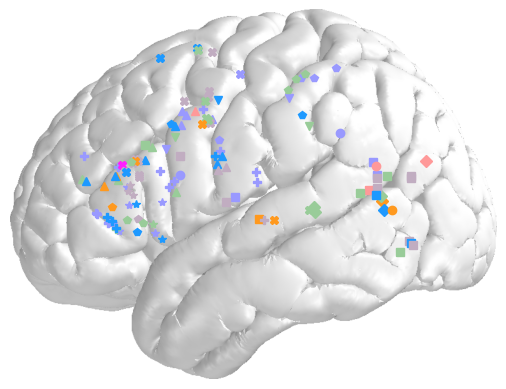

In [15]:
fig,ax = plt.subplots()
img = mpimg.imread(path +"/elecs/Brain2D/MNI152_brain2D.png")

ax.imshow(img)
kdeplotdata = {"x":[],"y":[],"specific":[]}
for HS in subjects:
    n_std = 5
    subject = f"HS{HS}"
    xy = scio.loadmat(path +"/elecs/All_elecs/"+ subject + "_warped_elec_pos2D.mat")['elecmatrix']
    n_chans = 256 if xy.shape[0] >= 256 else 128
    
    all_sig_elecs =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs{n_std}.npy",allow_pickle=True).item()
    anatomy = scio.loadmat(path+f"/elecs/All_elecs/HS{HS}_elecs_all_warped.mat")['anatomy']

    z = plt.get_cmap("coolwarm")
    #plt.title("HS_"+str(HS)+": "+task+" "+str(time)) and get_color(f'{HS}_{i}')[1]<3
    
    task = "cue"
    for i in range(n_chans):
        
        if get_color(f'{HS}_{i}')[1]>-1 :

            ax.plot(xy[i][0], xy[i][1],color = get_color(f'{HS}_{i}')[0],alpha =1,marker=marker_type[str(HS)])
            kdeplotdata["x"].append(xy[i][0])
            kdeplotdata["y"].append(xy[i][1])
            kdeplotdata["specific"].append(get_color(f'{HS}_{i}')[1])

    ax.grid('off') 
    ax.axis('off')
    color_set = np.array([[255,153,153],[153,204,153],[153,153,255],[255,153,30],[30,153,255],[255,30,255],[193,173,193]])

    kde_color = [tuple(color_set[1]/255),tuple(color_set[0]/255),tuple(color_set[2]/255),]

    # sns.kdeplot(data=df_f,x='x',y='y',hue="specific",palette=kde_color,fill=True,alpha=0.2)
    plt.savefig("../figures/fig1_H.pdf",dpi=1000)

In [22]:
kdeplotdata

{'x': [476.82000885545017,
  478.2780488201763,
  652.4967229003526,
  583.9892845797083,
  581.5760489298932,
  586.1663176713184,
  157.2668967823828,
  161.0686371357457,
  171.23722387654266,
  185.49037113316479,
  197.72270208346322,
  182.4026727510447,
  184.87814306790142,
  192.73608336248606,
  226.51896318974013,
  237.47036599183855,
  198.77113345034155,
  187.20423695891543,
  223.99774524859976,
  237.58675688663152,
  210.70131966136563,
  266.49233689065477,
  591.1041290443457,
  352.3424037675394,
  338.67958851638593,
  628.0927832984956,
  569.6765913518653,
  562.1506525932473,
  548.9377081901324,
  574.7896074666623,
  575.3468798550056,
  390.1453861317574,
  628.2207460940518,
  575.1679718828988,
  574.4373123653604,
  625.6053374488089,
  628.5052559100382,
  631.8793430139397,
  612.1926007710024,
  257.37314048497217,
  249.09203981878676,
  235.04462189882258,
  115.84086008663013,
  168.73307922903308,
  135.07142544799933,
  153.63534832537164,
  155.0

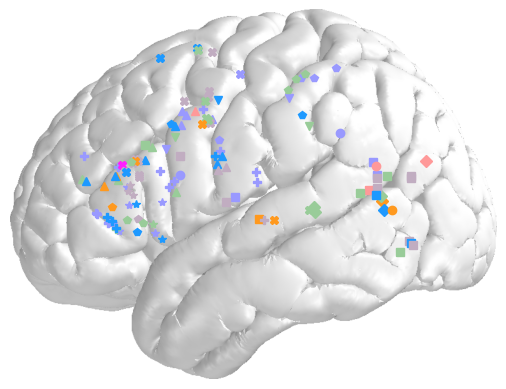

In [23]:
fig,ax = plt.subplots()
img = mpimg.imread(path +"/elecs/Brain2D/MNI152_brain2D.png")

ax.imshow(img)
kdeplotdata = {"x":[],"y":[],"specific":[]}
for HS in subjects:
    n_std = 5
    subject = f"HS{HS}"
    xy = scio.loadmat(path +"/elecs/All_elecs/"+ subject + "_warped_elec_pos2D.mat")['elecmatrix']
    n_chans = 256 if xy.shape[0] >= 256 else 128
    
    all_sig_elecs =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs{n_std}.npy",allow_pickle=True).item()
    anatomy = scio.loadmat(path+f"/elecs/All_elecs/HS{HS}_elecs_all_warped.mat")['anatomy']

    z = plt.get_cmap("coolwarm")
    #plt.title("HS_"+str(HS)+": "+task+" "+str(time))
    
    task = "cue"
    for i in range(n_chans):
        
        if get_color(f'{HS}_{i}')[1]>-1:

            ax.plot(xy[i][0], xy[i][1],color = get_color(f'{HS}_{i}')[0],alpha =1,marker=marker_type[str(HS)])
            kdeplotdata["x"].append(xy[i][0])
            kdeplotdata["y"].append(xy[i][1])
            kdeplotdata["specific"].append(get_color(f'{HS}_{i}')[1])
    ax.grid('off') 
    ax.axis('off')
    # color_set = np.array([[255,153,153],[153,204,153],[153,153,255],[255,153,30],[30,153,255],[255,30,255],[193,173,193]])

    # kde_color = [tuple(color_set[0]/255),tuple(color_set[1]/255),tuple(color_set[2]/255)]

    # sns.kdeplot(data=df_f,x='x',y='y',hue="label",palette=kde_color,fill=True,alpha=0.5)


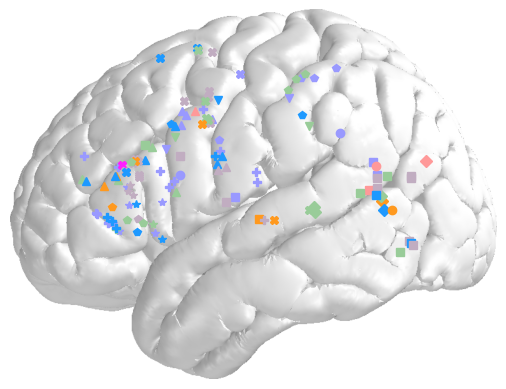

In [25]:
fig,ax = plt.subplots()
img = mpimg.imread(path +"/elecs/Brain2D/MNI152_brain2D.png")

ax.imshow(img)
kdeplotdata = {"x":[],"y":[],"specific":[]}
for HS in subjects:
    n_std = 5
    subject = f"HS{HS}"
    xy = scio.loadmat(path +"/elecs/All_elecs/"+ subject + "_warped_elec_pos2D.mat")['elecmatrix']
    n_chans = 256 if xy.shape[0] >= 256 else 128
    
    all_sig_elecs =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs{n_std}.npy",allow_pickle=True).item()
    anatomy = scio.loadmat(path+f"/elecs/All_elecs/HS{HS}_elecs_all_warped.mat")['anatomy']

    z = plt.get_cmap("coolwarm")
    #plt.title("HS_"+str(HS)+": "+task+" "+str(time))
    
    task = "cue"
    for i in range(n_chans):
        
        if get_color(f'{HS}_{i}')[1]>-1:

            ax.plot(xy[i][0], xy[i][1],color = get_color(f'{HS}_{i}')[0],alpha =1,marker=marker_type[str(HS)])
            kdeplotdata["x"].append(xy[i][0])
            kdeplotdata["y"].append(xy[i][1])
            if get_color(f'{HS}_{i}')[1]>2:
                kdeplotdata["specific"].append(get_color(f'{HS}_{i}')[1])
            else:
                kdeplotdata["specific"].append(name_list[get_color(f'{HS}_{i}')[1]])
    ax.grid('off') 
    ax.axis('off')
    # color_set = np.array([[255,153,153],[153,204,153],[153,153,255],[255,153,30],[30,153,255],[255,30,255],[193,173,193]])

    # kde_color = [tuple(color_set[0]/255),tuple(color_set[1]/255),tuple(color_set[2]/255)]

    # sns.kdeplot(data=df_f,x='x',y='y',hue="label",palette=kde_color,fill=True,alpha=0.5)


In [26]:
df = pd.DataFrame(kdeplotdata)
df_f = df[df['specific'].isin(name_list)]
df_f

x           y     specific
0    476.820009  309.358678  Pseudo word
1    478.278049  318.156268  Pseudo word
2    652.496723  237.976371    Real word
4    581.576049  292.571896  Pseudo word
6    157.266897  331.908381       Pinyin
..          ...         ...          ...
123  456.385947  107.158906       Pinyin
124  510.972959   90.991540       Pinyin
125  461.756445  100.238956  Pseudo word
126  447.724083  108.233435  Pseudo word
127  436.512519  125.400176  Pseudo word

[68 rows x 3 columns]

In [27]:
df

x           y     specific
0    476.820009  309.358678  Pseudo word
1    478.278049  318.156268  Pseudo word
2    652.496723  237.976371    Real word
3    583.989285  299.651103            3
4    581.576049  292.571896  Pseudo word
..          ...         ...          ...
123  456.385947  107.158906       Pinyin
124  510.972959   90.991540       Pinyin
125  461.756445  100.238956  Pseudo word
126  447.724083  108.233435  Pseudo word
127  436.512519  125.400176  Pseudo word

[128 rows x 3 columns]

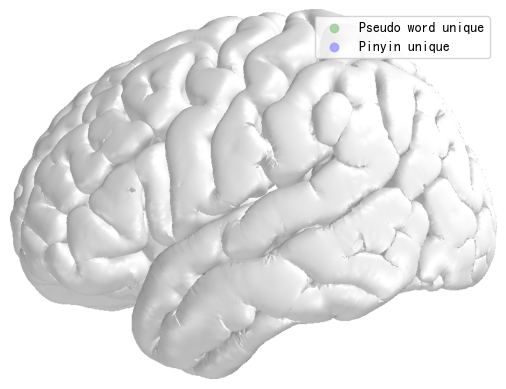

In [28]:
color_set = np.array([[255,153,153],[153,204,153],[153,153,255],[255,153,30],[30,153,255],[255,30,255],[193,173,193]])
fig,ax=plt.subplots()
ax.imshow(img)
kde_color = [tuple(color_set[0]/255),tuple(color_set[1]/255),tuple(color_set[2]/255)]
for i in range(2):
    df_fi = df_f[df_f['label']==i+1]
    sns.regplot(data=df_fi,x='x',y='y',color=kde_color[i+1])
ax.grid('off') 
ax.axis('off')

plt.legend(['Pseudo word unique','Pinyin unique'])

## 绘制不同激活程度在脑表面的情况

/tmp/ipykernel_41185/31408959.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_str)


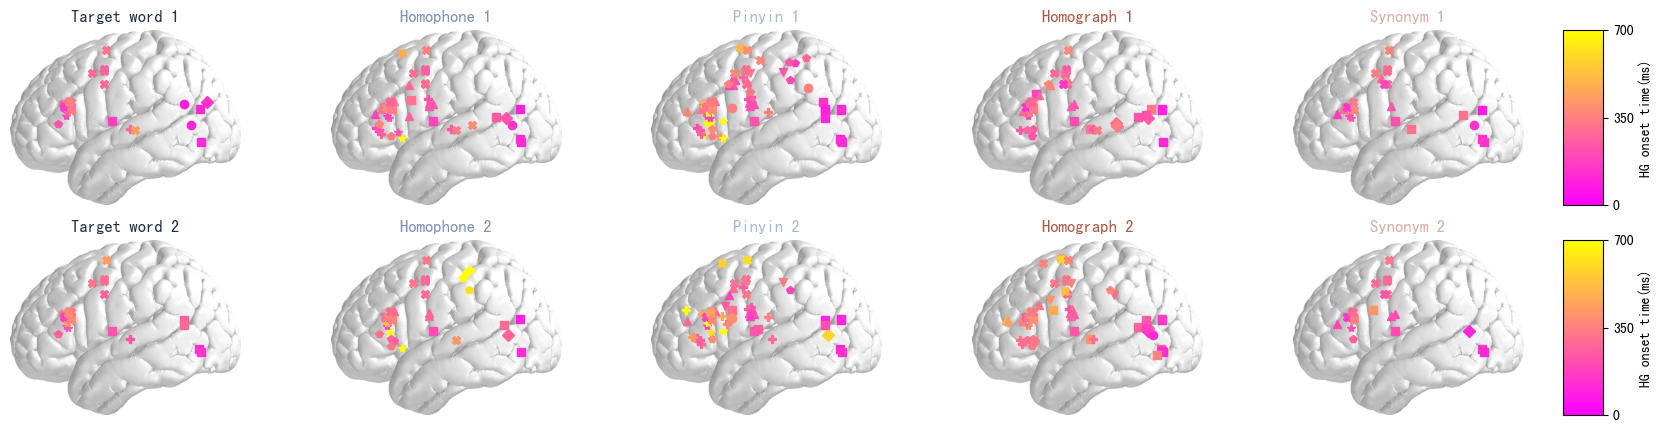

In [20]:
def add_right_cax(ax, pad, width):
    '''
    在一个ax右边追加与之等高的cax.
    pad是cax与ax的间距.
    width是cax的宽度.
    '''
    axpos = ax.get_position()
    caxpos = mpl.transforms.Bbox.from_extents(
        axpos.x1 + pad,
        axpos.y0,
        axpos.x1 + pad + width,
        axpos.y1
    )
    cax = ax.figure.add_axes(caxpos)

    return cax
mid_value = 350
max_value = 700
name_list = ["Target word","Homophone","Pinyin","Homograph","Synonym"]
from matplotlib import cm
import matplotlib as mpl
from matplotlib.cm import ScalarMappable
cmap_str = "spring"
def custom_cmap(value):
    cmap = cm.get_cmap(cmap_str)
    normalized_value = (value - 0) /( max_value-0)   
    return cmap(normalized_value)
img = mpimg.imread(path +"/elecs/Brain2D/MNI152_brain2D.png")
check_list_2 = ['树叶','数页','shù yè','对十','绿草']
check_list_1 = ['功课','宫客','gōng kè','力果','作业']
color_list = [(32/255,48/255,69/255),(125/255,144/255,184/255),(166/255,185/255,215/255),(174/255,88/255,69/255),(216/255,174/255,160/255)]
fig, axes = plt.subplots(2,5,figsize=(20,5))
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
for pic,_ in enumerate(check_list_1):
# img = np.load(path+"/elecs/Brain2D/MNI152_brain2D.png.npy")
    ax = axes[0,pic]
    ax.imshow(img)
    
    for HS in subjects:
        n_std = 5
        subject = f"HS{HS}"
        xy = scio.loadmat(path +"/elecs/All_elecs/"+ subject + "_warped_elec_pos2D.mat")['elecmatrix']
        n_chans = 256 if xy.shape[0] >= 256 else 128
        
        all_sig_elecs =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs{n_std}.npy",allow_pickle=True).item()
        all_sig_elecs_onset_offset =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs_time{n_std}.npy",allow_pickle=True).item()
        anatomy = scio.loadmat(path+f"/elecs/All_elecs/HS{HS}_elecs_all_warped.mat")['anatomy']

        #plt.title("HS_"+str(HS)+": "+task+" "+str(time))
        
        task = "cue"
        for i in range(n_chans):
            if i in all_sig_elecs[check_list_1[pic]+ " "+task]:
                index = all_sig_elecs[check_list_1[pic]+ " "+task].index(i)
                onset = all_sig_elecs_onset_offset[check_list_1[pic]+ " "+task][index][0]
                peak = all_sig_elecs_onset_offset[check_list_1[pic]+ " "+task][index][1]
                offset = all_sig_elecs_onset_offset[check_list_1[pic]+ " "+task][index][2]
                    #对皮尔森相似度正的为红色，负的为蓝色,不显著的为绿色, 不显著的电极为灰色
                #if offset<100:
                ax.plot(xy[i][0], xy[i][1],color = custom_cmap(10*onset),alpha =1,marker=marker_type[str(HS)])
        ax.grid('off') 
        ax.axis('off')
        ax.set_title(name_list[pic]+" 1",color = color_list[pic])


ax = axes[0,4]
sm = ScalarMappable(cmap=cmap_str)
sm.set_clim(0, max_value)  # 设置最小值和最大值
cax = add_right_cax(ax, pad=0.02, width=0.02)
cbar = fig.colorbar(sm, cax=cax,ticks=[0,mid_value, max_value])
cbar.set_label('HG onset time(ms)')
for pic,_ in enumerate(check_list_2):
# img = np.load(path+"/elecs/Brain2D/MNI152_brain2D.png.npy")
    ax = axes[1,pic]
    ax.imshow(img)
    
    for HS in subjects:
        n_std = 5
        subject = f"HS{HS}"
        xy = scio.loadmat(path +"/elecs/All_elecs/"+ subject + "_warped_elec_pos2D.mat")['elecmatrix']
        n_chans = 256 if xy.shape[0] >= 256 else 128
        
        all_sig_elecs =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs{n_std}.npy",allow_pickle=True).item()
        all_sig_elecs_onset_offset =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs_time{n_std}.npy",allow_pickle=True).item()
        anatomy = scio.loadmat(path+f"/elecs/All_elecs/HS{HS}_elecs_all_warped.mat")['anatomy']

        #plt.title("HS_"+str(HS)+": "+task+" "+str(time))
        
        task = "cue"
        for i in range(n_chans):
            if i in all_sig_elecs[check_list_2[pic]+ " "+task]:
                index = all_sig_elecs[check_list_2[pic]+ " "+task].index(i)

                onset = all_sig_elecs_onset_offset[check_list_2[pic]+ " "+task][index][0]
                peak = all_sig_elecs_onset_offset[check_list_2[pic]+ " "+task][index][1]
                offset = all_sig_elecs_onset_offset[check_list_2[pic]+ " "+task][index][2]
                    #对皮尔森相似度正的为红色，负的为蓝色,不显著的为绿色, 不显著的电极为灰色
                #if offset<100:
                ax.plot(xy[i][0], xy[i][1],color = custom_cmap(10*onset),alpha =1,marker=marker_type[str(HS)])
        ax.grid('off') 
        ax.axis('off')
        ax.set_title(name_list[pic]+" 2",color = color_list[pic])   

ax = axes[1,4]
sm = ScalarMappable(cmap=cmap_str)
sm.set_clim(0, max_value)  # 设置最小值和最大值
cax = add_right_cax(ax, pad=0.02, width=0.02)
cbar = fig.colorbar(sm, cax=cax,ticks=[0,mid_value, max_value])
cbar.set_label('HG onset time(ms)')

/tmp/ipykernel_41185/31408959.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_str)


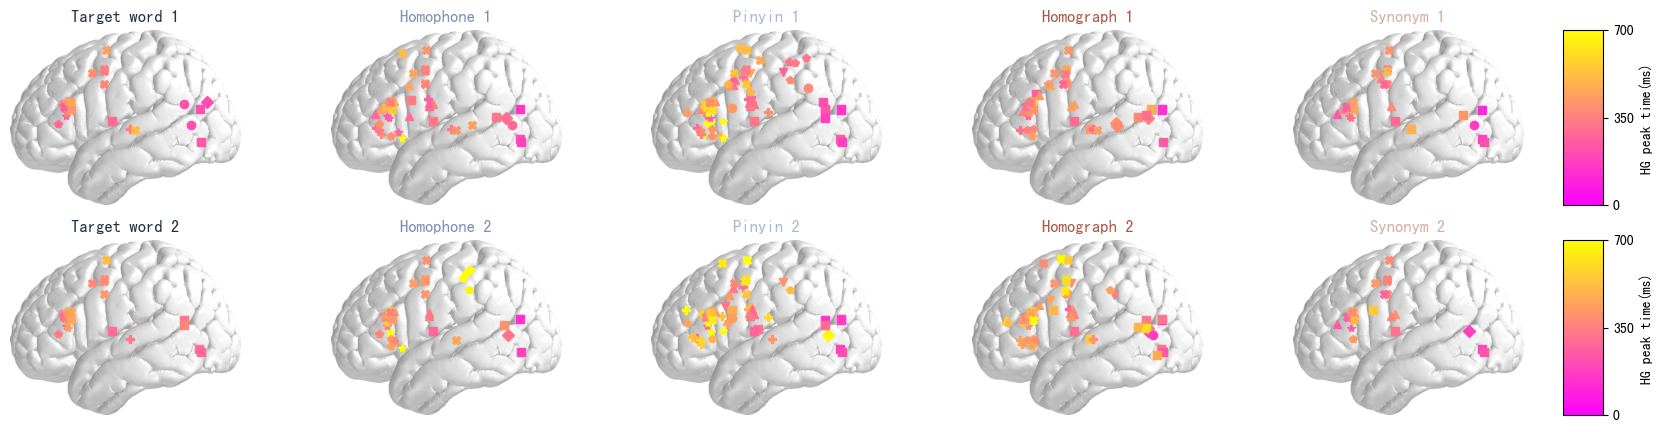

In [21]:
def add_right_cax(ax, pad, width):
    '''
    在一个ax右边追加与之等高的cax.
    pad是cax与ax的间距.
    width是cax的宽度.
    '''
    axpos = ax.get_position()
    caxpos = mpl.transforms.Bbox.from_extents(
        axpos.x1 + pad,
        axpos.y0,
        axpos.x1 + pad + width,
        axpos.y1
    )
    cax = ax.figure.add_axes(caxpos)

    return cax
from matplotlib import cm
import matplotlib as mpl
from matplotlib.cm import ScalarMappable

img = mpimg.imread(path +"/elecs/Brain2D/MNI152_brain2D.png")

color_list = [(32/255,48/255,69/255),(125/255,144/255,184/255),(166/255,185/255,215/255),(174/255,88/255,69/255),(216/255,174/255,160/255)]
fig, axes = plt.subplots(2,5,figsize=(20,5)) 
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
temporal_feature = {}
for pic,_ in enumerate(check_list_1):
    temporal_feature[check_list_1[pic]] = {}
    temporal_feature[check_list_1[pic]]["onset"] = []
    temporal_feature[check_list_1[pic]]["peak"] = []
    temporal_feature[check_list_1[pic]]["offset"] = []
    temporal_feature[check_list_1[pic]]["region"] = []
    
# img = np.load(path+"/elecs/Brain2D/MNI152_brain2D.png.npy")
    ax = axes[0,pic]
    ax.imshow(img)
    
    for HS in subjects:
        n_std = 5
        subject = f"HS{HS}"
        xy = scio.loadmat(path +"/elecs/All_elecs/"+ subject + "_warped_elec_pos2D.mat")['elecmatrix']
        n_chans = 256 if xy.shape[0] >= 256 else 128
        
        all_sig_elecs =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs{n_std}.npy",allow_pickle=True).item()
        all_sig_elecs_onset_offset =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs_time{n_std}.npy",allow_pickle=True).item()
        anatomy = scio.loadmat(path+f"/elecs/All_elecs/HS{HS}_elecs_all_warped.mat")['anatomy']

        #plt.title("HS_"+str(HS)+": "+task+" "+str(time))
        
        task = "cue"
        for i in range(n_chans):
            if i in all_sig_elecs[check_list_1[pic]+ " "+task]:
                index = all_sig_elecs[check_list_1[pic]+ " "+task].index(i)
                onset = all_sig_elecs_onset_offset[check_list_1[pic]+ " "+task][index][0]
                peak = all_sig_elecs_onset_offset[check_list_1[pic]+ " "+task][index][1]
                offset = all_sig_elecs_onset_offset[check_list_1[pic]+ " "+task][index][2]
                if offset<100:
                    #对皮尔森相似度正的为红色，负的为蓝色,不显著的为绿色, 不显著的电极为灰色
                    ax.plot(xy[i][0], xy[i][1],color = custom_cmap(10*peak),alpha =1,marker=marker_type[str(HS)])
                    temporal_feature[check_list_1[pic]]["onset"].append(onset*10)
                    temporal_feature[check_list_1[pic]]["peak"].append(peak*10)
                    temporal_feature[check_list_1[pic]]["offset"].append(offset*10)
                    temporal_feature[check_list_1[pic]]["region"].append(region_abbr[anatomy[i][3][0]])
                    
        ax.grid('off') 
        ax.axis('off')
        ax.set_title(name_list[pic]+" 1",color = color_list[pic])


ax = axes[0,4]
sm = ScalarMappable(cmap=cmap_str)
sm.set_clim(0, max_value)  # 设置最小值和最大值
cax = add_right_cax(ax, pad=0.02, width=0.02)
cbar = fig.colorbar(sm, cax=cax,ticks=[0,mid_value, max_value])
cbar.set_label('HG peak time(ms)')
for pic,_ in enumerate(check_list_2):
    temporal_feature[check_list_2[pic]] = {}
    temporal_feature[check_list_2[pic]]["onset"] = []
    temporal_feature[check_list_2[pic]]["peak"] = []
    temporal_feature[check_list_2[pic]]["offset"] = []
    temporal_feature[check_list_2[pic]]["region"] = []
    
# img = np.load(path+"/elecs/Brain2D/MNI152_brain2D.png.npy")
    ax = axes[1,pic]
    ax.imshow(img)
    
    for HS in subjects:
        n_std = 5
        subject = f"HS{HS}"
        xy = scio.loadmat(path +"/elecs/All_elecs/"+ subject + "_warped_elec_pos2D.mat")['elecmatrix']
        n_chans = 256 if xy.shape[0] >= 256 else 128
        
        all_sig_elecs =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs{n_std}.npy",allow_pickle=True).item()
        all_sig_elecs_onset_offset =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs_time{n_std}.npy",allow_pickle=True).item()
        anatomy = scio.loadmat(path+f"/elecs/All_elecs/HS{HS}_elecs_all_warped.mat")['anatomy']

        z = plt.get_cmap("coolwarm")
        #plt.title("HS_"+str(HS)+": "+task+" "+str(time))
        
        task = "cue"
        for i in range(n_chans):
            if i in all_sig_elecs[check_list_2[pic]+ " "+task]:
                index = all_sig_elecs[check_list_2[pic]+ " "+task].index(i)

                onset = all_sig_elecs_onset_offset[check_list_2[pic]+ " "+task][index][0]
                peak = all_sig_elecs_onset_offset[check_list_2[pic]+ " "+task][index][1]
                offset = all_sig_elecs_onset_offset[check_list_2[pic]+ " "+task][index][2]
                    #对皮尔森相似度正的为红色，负的为蓝色,不显著的为绿色, 不显著的电极为灰色
                if offset<100:
                    ax.plot(xy[i][0], xy[i][1],color = custom_cmap(10*peak),alpha =1,marker=marker_type[str(HS)])
                    temporal_feature[check_list_2[pic]]["onset"].append(onset*10)
                    temporal_feature[check_list_2[pic]]["peak"].append(peak*10)
                    temporal_feature[check_list_2[pic]]["offset"].append(offset*10)
                    temporal_feature[check_list_2[pic]]["region"].append(region_abbr[anatomy[i][3][0]])
        ax.grid('off') 
        ax.axis('off')
        ax.set_title(name_list[pic]+" 2",color = color_list[pic])   

ax = axes[1,4]
sm = ScalarMappable(cmap=cmap_str)
sm.set_clim(0, max_value)  # 设置最小值和最大值
cax = add_right_cax(ax, pad=0.02, width=0.02)
cbar = fig.colorbar(sm, cax=cax,ticks=[0,mid_value, max_value])
cbar.set_label('HG peak time(ms)')

/tmp/ipykernel_41185/31408959.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_str)


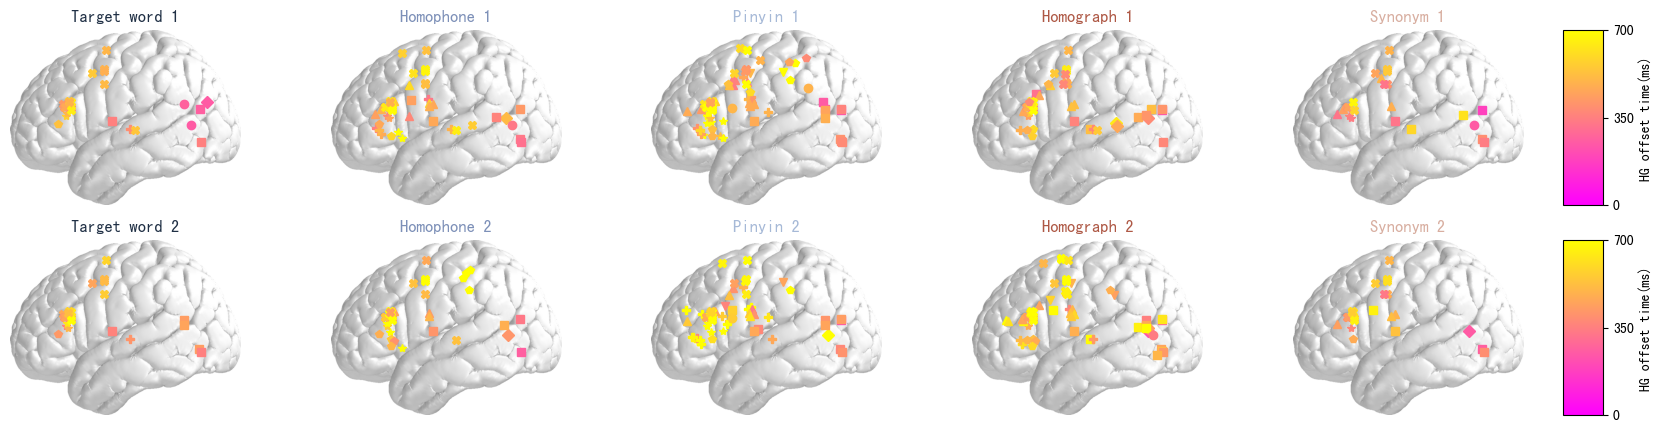

In [22]:
def add_right_cax(ax, pad, width):
    '''
    在一个ax右边追加与之等高的cax.
    pad是cax与ax的间距.
    width是cax的宽度.
    '''
    axpos = ax.get_position()
    caxpos = mpl.transforms.Bbox.from_extents(
        axpos.x1 + pad,
        axpos.y0,
        axpos.x1 + pad + width,
        axpos.y1
    )
    cax = ax.figure.add_axes(caxpos)

    return cax
from matplotlib import cm
import matplotlib as mpl
from matplotlib.cm import ScalarMappable


img = mpimg.imread(path +"/elecs/Brain2D/MNI152_brain2D.png")
fig, axes = plt.subplots(2,5,figsize=(20,5))
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
for pic,_ in enumerate(check_list_1):
# img = np.load(path+"/elecs/Brain2D/MNI152_brain2D.png.npy")
    ax = axes[0,pic]
    ax.imshow(img)
    
    for HS in subjects:
        n_std = 5
        subject = f"HS{HS}"
        xy = scio.loadmat(path +"/elecs/All_elecs/"+ subject + "_warped_elec_pos2D.mat")['elecmatrix']
        n_chans = 256 if xy.shape[0] >= 256 else 128
        
        all_sig_elecs =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs{n_std}.npy",allow_pickle=True).item()
        all_sig_elecs_onset_offset =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs_time{n_std}.npy",allow_pickle=True).item()
        anatomy = scio.loadmat(path+f"/elecs/All_elecs/HS{HS}_elecs_all_warped.mat")['anatomy']

        #plt.title("HS_"+str(HS)+": "+task+" "+str(time))
        
        task = "cue"
        for i in range(n_chans):
            if i in all_sig_elecs[check_list_1[pic]+ " "+task]:
                index = all_sig_elecs[check_list_1[pic]+ " "+task].index(i)
                onset = all_sig_elecs_onset_offset[check_list_1[pic]+ " "+task][index][0]
                peak = all_sig_elecs_onset_offset[check_list_1[pic]+ " "+task][index][1]
                offset = all_sig_elecs_onset_offset[check_list_1[pic]+ " "+task][index][2]
                    #对皮尔森相似度正的为红色，负的为蓝色,不显著的为绿色, 不显著的电极为色
                if offset<100:
                    ax.plot(xy[i][0], xy[i][1],color = custom_cmap(10*offset),alpha =1,marker=marker_type[str(HS)])
        ax.grid('off') 
        ax.axis('off')
        ax.set_title(name_list[pic]+" 1",color = color_list[pic])


ax = axes[0,4]
sm = ScalarMappable(cmap=cmap_str)
sm.set_clim(0, max_value)  # 设置最小值和最大值
cax = add_right_cax(ax, pad=0.02, width=0.02)
cbar = fig.colorbar(sm, cax=cax,ticks=[0,mid_value, max_value])
cbar.set_label('HG offset time(ms)')
for pic,_ in enumerate(check_list_2):
# img = np.load(path+"/elecs/Brain2D/MNI152_brain2D.png.npy")
    ax = axes[1,pic]
    ax.imshow(img)
    
    for HS in subjects:
        n_std = 5
        subject = f"HS{HS}"
        xy = scio.loadmat(path +"/elecs/All_elecs/"+ subject + "_warped_elec_pos2D.mat")['elecmatrix']
        n_chans = 256 if xy.shape[0] >= 256 else 128
        
        all_sig_elecs =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs{n_std}.npy",allow_pickle=True).item()
        all_sig_elecs_onset_offset =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs_time{n_std}.npy",allow_pickle=True).item()
        anatomy = scio.loadmat(path+f"/elecs/All_elecs/HS{HS}_elecs_all_warped.mat")['anatomy']

        z = plt.get_cmap("coolwarm")
        #plt.title("HS_"+str(HS)+": "+task+" "+str(time))
        
        task = "cue"
        for i in range(n_chans):
            if i in all_sig_elecs[check_list_2[pic]+ " "+task]:
                index = all_sig_elecs[check_list_2[pic]+ " "+task].index(i)

                onset = all_sig_elecs_onset_offset[check_list_2[pic]+ " "+task][index][0]
                peak = all_sig_elecs_onset_offset[check_list_2[pic]+ " "+task][index][1]
                offset = all_sig_elecs_onset_offset[check_list_2[pic]+ " "+task][index][2]
                if offset<100:
                    ax.plot(xy[i][0], xy[i][1],color = custom_cmap(10*offset),alpha =1,marker=marker_type[str(HS)])
        ax.grid('off') 
        ax.axis('off')
        ax.set_title(name_list[pic]+" 2",color = color_list[pic])   

ax = axes[1,4]
sm = ScalarMappable(cmap=cmap_str)
sm.set_clim(0, max_value)  # 设置最小值和最大值
cax = add_right_cax(ax, pad=0.02, width=0.02)
cbar = fig.colorbar(sm, cax=cax,ticks=[0,mid_value, max_value])
cbar.set_label('HG offset time(ms)')

# 绘制折线图

In [40]:
max_value=750

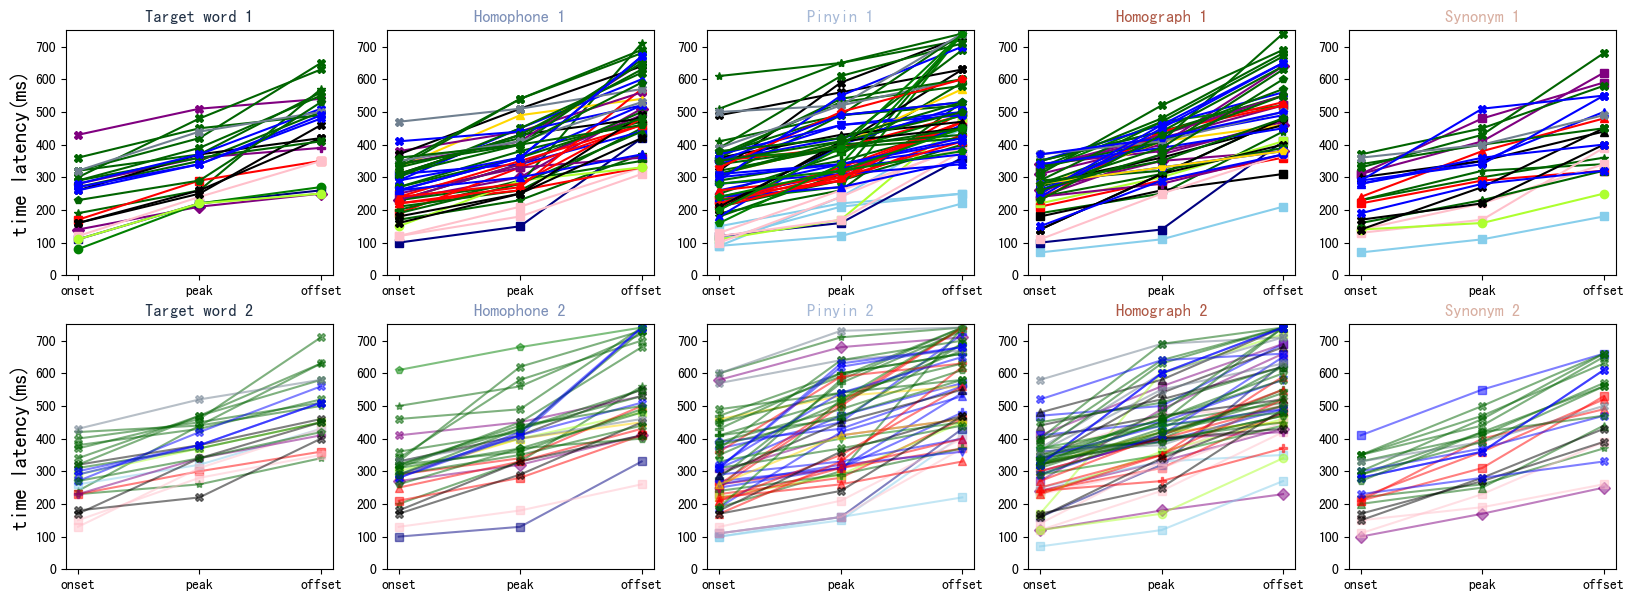

In [41]:
def add_right_cax(ax, pad, width):
    '''
    在一个ax右边追加与之等高的cax.
    pad是cax与ax的间距.
    width是cax的宽度.
    '''
    axpos = ax.get_position()
    caxpos = mpl.transforms.Bbox.from_extents(
        axpos.x1 + pad,
        axpos.y0,
        axpos.x1 + pad + width,
        axpos.y1
    )
    cax = ax.figure.add_axes(caxpos)

    return cax
from matplotlib import cm
import matplotlib as mpl
from matplotlib.cm import ScalarMappable

marker_type_all = {}
img = mpimg.imread(path +"/elecs/Brain2D/MNI152_brain2D.png")

color_list = [(32/255,48/255,69/255),(125/255,144/255,184/255),(166/255,185/255,215/255),(174/255,88/255,69/255),(216/255,174/255,160/255)]
fig, axes = plt.subplots(2,5,figsize=(20,7))
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
# 记录所有
temporal_feature
for pic,_ in enumerate(check_list_1):
# img = np.load(path+"/elecs/Brain2D/MNI152_brain2D.png.npy")
    ax = axes[0,pic]
    box_data = {}
    box_data['onset'] = []
    box_data['peak'] = []
    box_data['offset'] = []
    for HS in subjects:
        n_std = 5
        subject = f"HS{HS}"
        xy = scio.loadmat(path +"/elecs/All_elecs/"+ subject + "_warped_elec_pos2D.mat")['elecmatrix']
        n_chans = 256 if xy.shape[0] >= 256 else 128
        
        all_sig_elecs =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs{n_std}.npy",allow_pickle=True).item()
        all_sig_elecs_onset_offset =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs_time{n_std}.npy",allow_pickle=True).item()
        anatomy = scio.loadmat(path+f"/elecs/All_elecs/HS{HS}_elecs_all_warped.mat")['anatomy']

        z = plt.get_cmap("coolwarm")
        #plt.title("HS_"+str(HS)+": "+task+" "+str(time))
        
        task = "cue"
        for i in range(n_chans):
            if i in all_sig_elecs[check_list_1[pic]+ " "+task]:
                index = all_sig_elecs[check_list_1[pic]+ " "+task].index(i)
                onset = all_sig_elecs_onset_offset[check_list_1[pic]+ " "+task][index][0]
                peak = all_sig_elecs_onset_offset[check_list_1[pic]+ " "+task][index][1]
                offset = all_sig_elecs_onset_offset[check_list_1[pic]+ " "+task][index][2]
                    #对皮尔森相似度正的为红色，负的为蓝色,不显著的为绿色, 不显著的电极为灰色
                if offset<100:
                    ax.plot(range(3),np.array([onset,peak,offset])*10,color = color_set_region[anatomy[i][3][0]],alpha =1,marker=marker_type[str(HS)])

        ax.grid(False)
        ax.set_xticks([0, 1, 2], ["onset","peak","offset"])
        ax.set_ylim([0,max_value]) 
        if pic ==0:
            ax.set_ylabel("time latency(ms)",fontsize=15)
        ax.set_title(name_list[pic]+" 1",color = color_list[pic])


# ax = axes[0,4]
# sm = ScalarMappable(cmap='brg')
# sm.set_clim(0, 2000)  # 设置最小值和最大值
# cax = add_right_cax(ax, pad=0.02, width=0.02)
# cbar = fig.colorbar(sm, cax=cax,ticks=[0,1000, 1800])
# cbar.set_label('HG onset time(ms)')
for pic,_ in enumerate(check_list_2):
# img = np.load(path+"/elecs/Brain2D/MNI152_brain2D.png.npy")
    ax = axes[1,pic]
    
    for HS in subjects:
        n_std = 5
        subject = f"HS{HS}"
        xy = scio.loadmat(path +"/elecs/All_elecs/"+ subject + "_warped_elec_pos2D.mat")['elecmatrix']
        n_chans = 256 if xy.shape[0] >= 256 else 128
        
        all_sig_elecs =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs{n_std}.npy",allow_pickle=True).item()
        all_sig_elecs_onset_offset =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs_time{n_std}.npy",allow_pickle=True).item()
        anatomy = scio.loadmat(path+f"/elecs/All_elecs/HS{HS}_elecs_all_warped.mat")['anatomy']

        z = plt.get_cmap("coolwarm")
        #plt.title("HS_"+str(HS)+": "+task+" "+str(time))
        
        task = "cue"
        for i in range(n_chans):
            if i in all_sig_elecs[check_list_2[pic]+ " "+task]:
                index = all_sig_elecs[check_list_2[pic]+ " "+task].index(i)

                onset = all_sig_elecs_onset_offset[check_list_2[pic]+ " "+task][index][0]
                peak = all_sig_elecs_onset_offset[check_list_2[pic]+ " "+task][index][1]
                offset = all_sig_elecs_onset_offset[check_list_2[pic]+ " "+task][index][2]

                if offset<100:
                    ax.plot(range(3),np.array([onset,peak,offset])*10,color = color_set_region[anatomy[i][3][0]],alpha =0.5,marker=marker_type[str(HS)])

                
        ax.grid(False)
        ax.set_xticks([0, 1, 2], ["onset","peak","offset"])
        ax.set_ylim([0,max_value]) 
        if pic ==0:
            ax.set_ylabel("time latency(ms)",fontsize=15)
        ax.set_title(name_list[pic]+" 2",color = color_list[pic])   

# ax = axes[1,4]
# sm = ScalarMappable(cmap='brg')
# sm.set_clim(0, 2000)  # 设置最小值和最大值
# cax = add_right_cax(ax, pad=0.02, width=0.02)
# cbar = fig.colorbar(sm, cax=cax,ticks=[0,1000, 1800])
# cbar.set_label('HG onset time(ms)')

# 绘制合并后的箱型图

In [26]:
word_list = ['功课',  '宫客','gōng kè','力果','作业',   '树叶',  '数页','shù yè','对十','绿草' ]
name_list = ["target word","homophone","pinyin","homograph","synonym"]
word_2_name = {"Real word":['功课','树叶','绿草','作业'],
               "Pesudo word":["宫客","数页","力果","对十"],
               "Pinyin":['gōng kè','shù yè'],
               }
combined_temporal_feature = {}
for name in word_2_name:
    combined_temporal_feature[name] = {}
    for feature in temporal_feature["功课"]:
        combined_temporal_feature[name][feature] = []
    for word in word_2_name[name]:
        for feature in temporal_feature[word]:
            combined_temporal_feature[name][feature].extend(temporal_feature[word][feature])
        


In [27]:
temporal_feature_DF_tw = pd.DataFrame(combined_temporal_feature['Real word'])
temporal_feature_DF_tw['word'] = 'Real word'
temporal_feature_DF_hp = pd.DataFrame(combined_temporal_feature['Pesudo word'])
temporal_feature_DF_hp['word'] = 'Pesudo word'
temporal_feature_DF_py = pd.DataFrame(combined_temporal_feature['Pinyin'])
temporal_feature_DF_py['word'] = 'Pinyin'

df = pd.concat([temporal_feature_DF_tw, temporal_feature_DF_hp,temporal_feature_DF_py])


## groupby region

In [34]:
df

onset  peak  offset region       word
0      140   210     250    STG  Real word
1      190   260     570   pTri  Real word
2      270   350     500   pTri  Real word
3      170   290     350    PCG  Real word
4      110   220     260     Lo  Real word
..     ...   ...     ...    ...        ...
124    600   780     830   pMFG     Pinyin
125    310   620     680     PC     Pinyin
126    310   630     680     PC     Pinyin
127    190   520     780    SMG     Pinyin
128    390   490     610   pTri     Pinyin

[408 rows x 5 columns]

ValueError: `x` and `y` must be of nonzero size.

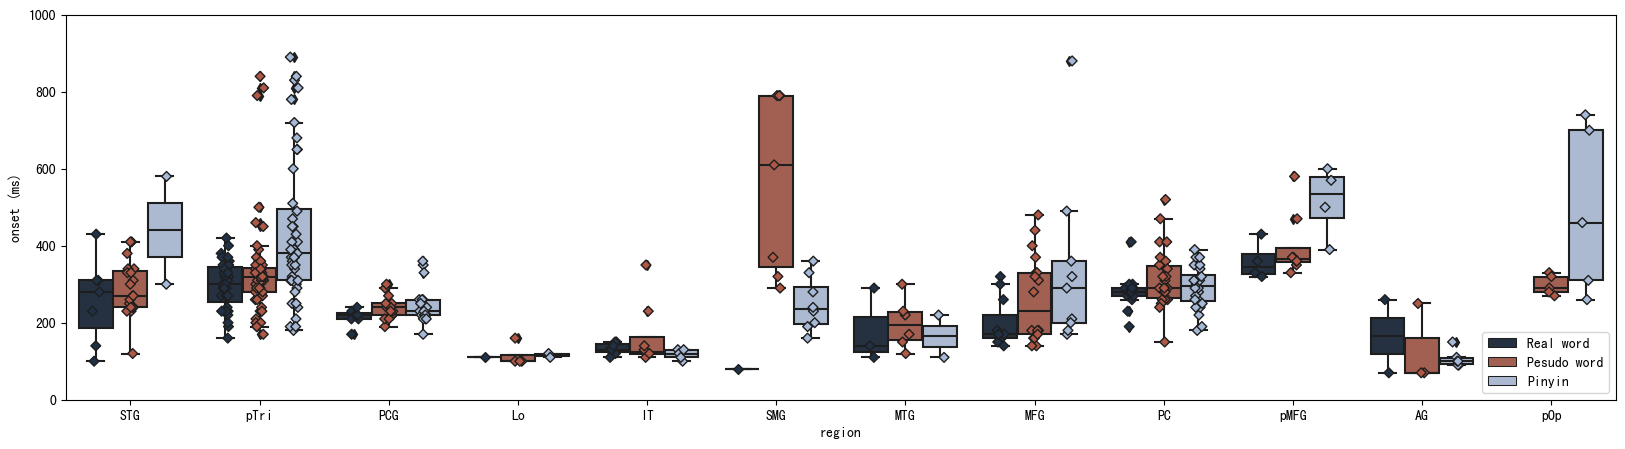

In [36]:
color_list = {'Real word':(32/255,48/255,69/255),
              'Pinyin':(166/255,185/255,215/255),
              'Pesudo word':(174/255,88/255,69/255),
}
plt.figure(figsize=(20,5))
regions = df['region'].unique()

        
# 绘制箱线图
sns.boxplot(x='region', y='onset', hue='word', data=df,palette=color_list)
sns.stripplot(x='region', y='onset', hue='word', data=df, dodge=True, jitter=True,linewidth =1 ,marker="D",alpha=1,palette=color_list)

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[:3]
labels = labels[:3]
plt.legend(handles, labels, loc='lower right')
plt.ylabel("onset (ms)")
plt.ylim([0,1000])
list_a = list(np.unique(df['region']))
list_b = list(np.unique(df['word']))
from itertools import product
# 添加P值
pair_one=[]
for i,j in product(list_a,list_b):
    pair_one.append((i,j))
box_pairs = []
for i,pair in enumerate(pair_one):
    for j in range(i+1,len(pair_one)):
        if pair[0] == pair_one[j][0] :
            box_pairs.append((pair,pair_one[j]))
 
annotator =  Annotator(ax, data=df, x="region",y="onset",hue="word",
                      pairs=box_pairs)
test_name = "t-test_ind"
test_name = "Mann-Whitney"
annotator.configure(test=test_name, text_format='star',line_height=0.03,line_width=1)
annotator.apply_and_annotate()

/tmp/ipykernel_43781/179037212.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region["onset_peak"] = df_region['offset']-df_region['onset']
/tmp/ipykernel_43781/179037212.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region["onset_peak"] = df_region['offset']-df_region['onset']
/tmp/ipykernel_43781/179037212.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

(0.0, 500.0)

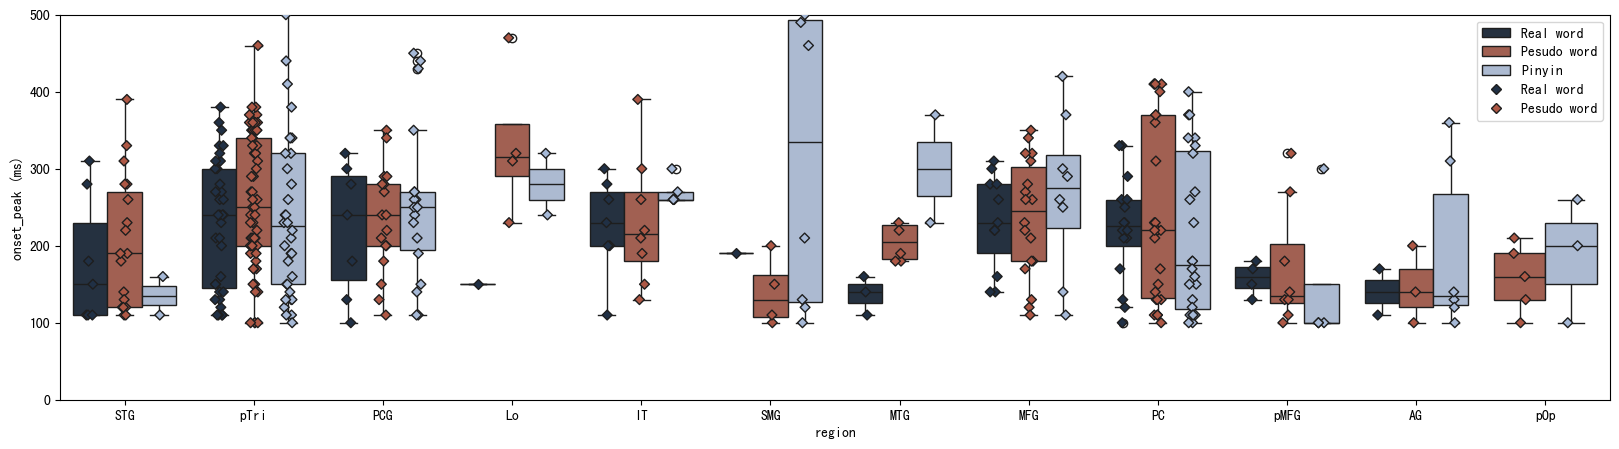

In [32]:

plt.figure(figsize=(20,5))
regions = df['region'].unique()
for region in regions:
    # 从数据中选择当前区域的数据
    df_region = df[df['region'] == region]
    df_region["onset_peak"] = df_region['offset']-df_region['onset']
    # 绘制箱线图
    sns.boxplot(x='region', y='onset_peak', hue='word', data=df_region,palette=color_list)
    sns.stripplot(x='region', y='onset_peak', hue='word', data=df_region, dodge=True, jitter=True,linewidth =1 ,marker="D",alpha=1,palette=color_list)
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[:5]
labels = labels[:5]
plt.legend(handles, labels, loc='upper right')
plt.ylabel("onset_peak (ms)")
plt.ylim([0,500])

/tmp/ipykernel_8923/4055322628.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='word', y='onset', data=df,palette=color_list)
/tmp/ipykernel_8923/4055322628.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='word', y='onset', data=df, dodge=True, jitter=True,linewidth =1 ,marker="D",alpha=1,palette=color_list)


Text(0, 0.5, 'onset (ms)')

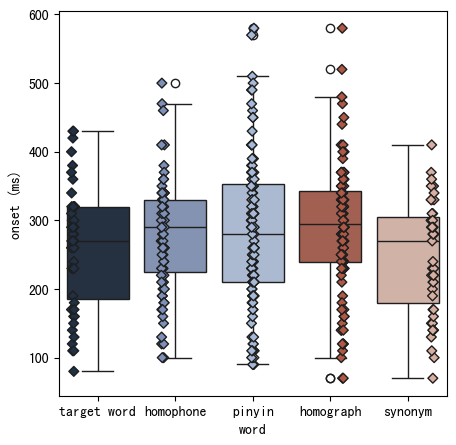

In [90]:

plt.figure(figsize=(5,5))
word_list = df['word'].unique()
for word in word_list:
    # 从数据中选择当前区域的数据
    df_word = df[df['word'] == word]
        
    # 绘制箱线图
sns.boxplot(x='word', y='onset', data=df,palette=color_list)
sns.stripplot(x='word', y='onset', data=df, dodge=True, jitter=True,linewidth =1 ,marker="D",alpha=1,palette=color_list)
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[:5]
labels = labels[:5]
plt.ylabel("onset (ms)")

In [24]:
color_set_region = {'superiorfrontal': 'grey',
             'STG': 'purple',
             'AG': 'skyblue',
             'MFG': 'black',
             'pTri': 'darkgreen',
             'PCG': 'red',
             'pOp': 'gold',
             'MTG': 'greenyellow',
             'IT': 'pink',
             'parsorbitalis': 'olive',
             'SMG': 'green',
             'Lo': 'navy',
             'PC': 'blue',
             'pMFG': 'slategrey'}
plt.figure(figsize=(10,5))

sns.boxplot(x='region', y='onset', data=df,palette=color_set_region)
sns.stripplot(x='region', y='onset', data=df, dodge=False, jitter=True,linewidth =1 ,marker="D",alpha=1,palette=color_set_region)

plt.ylabel("onset (ms)")

NameError: name 'df' is not defined

<Figure size 1000x500 with 0 Axes>

## 对各个进行检验

/tmp/ipykernel_8923/452250199.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='onset', data=df,palette=color_set_region)


Text(0, 0.5, 'onset (ms)')

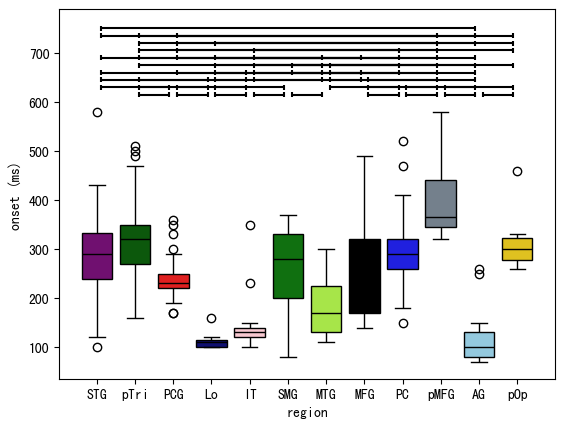

In [80]:
from scipy import stats
sns.boxplot(x='region', y='onset', data=df,palette=color_set_region)
n_flag= 0
sig_region = {}
for index,region_1 in enumerate( regions) :
    for index_2 in range(index+1,len(regions)):
        s,p= stats.ranksums(df[df['region']==region_1]['onset'],df[df['region']==regions[index_2]]['onset'])
        if p<0.05:
            sig_region[f"{region_1}_{regions[index_2]}"] = s 
            plt.hlines(xmin=index+0.1,xmax=index_2-0.1,y=600+(index_2-index)*15,color='k')
            plt.vlines(ymin=600+(index_2-index)*15-5,ymax=600+(index_2-index)*15+5,x=index+0.1,color='k')
            plt.vlines(ymin=600+(index_2-index)*15-5,ymax=600+(index_2-index)*15+5,x=index_2-0.1,color='k')
            n_flag += 1
plt.ylabel("onset (ms)")

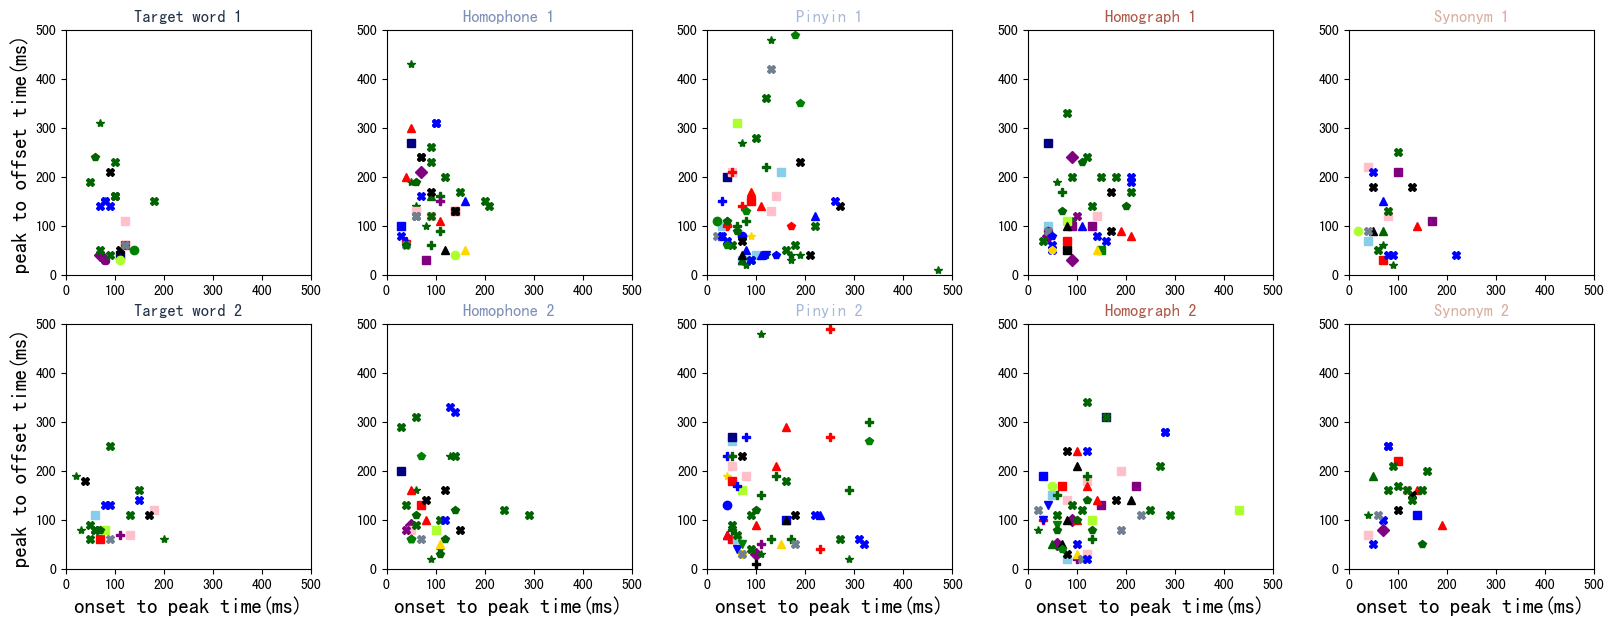

In [23]:
def add_right_cax(ax, pad, width):
    '''
    在一个ax右边追加与之等高的cax.
    pad是cax与ax的间距.
    width是cax的宽度.
    '''
    axpos = ax.get_position()
    caxpos = mpl.transforms.Bbox.from_extents(
        axpos.x1 + pad,
        axpos.y0,
        axpos.x1 + pad + width,
        axpos.y1
    )
    cax = ax.figure.add_axes(caxpos)

    return cax
from matplotlib import cm
import matplotlib as mpl
from matplotlib.cm import ScalarMappable

marker_type_all = {}
img = mpimg.imread(path +"/elecs/Brain2D/MNI152_brain2D.png")

color_list = [(32/255,48/255,69/255),(125/255,144/255,184/255),(166/255,185/255,215/255),(174/255,88/255,69/255),(216/255,174/255,160/255)]
fig, axes = plt.subplots(2,5,figsize=(20,7))
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
for pic,_ in enumerate(check_list_1):
# img = np.load(path+"/elecs/Brain2D/MNI152_brain2D.png.npy")
    ax = axes[0,pic]
    box_data = {}
    box_data['onset'] = []
    box_data['peak'] = []
    box_data['offset'] = []
    for HS in subjects:
        n_std = 5
        subject = f"HS{HS}"
        xy = scio.loadmat(path +"/elecs/All_elecs/"+ subject + "_warped_elec_pos2D.mat")['elecmatrix']
        n_chans = 256 if xy.shape[0] >= 256 else 128
        
        all_sig_elecs =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs{n_std}.npy",allow_pickle=True).item()
        all_sig_elecs_onset_offset =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs_time{n_std}.npy",allow_pickle=True).item()
        anatomy = scio.loadmat(path+f"/elecs/All_elecs/HS{HS}_elecs_all_warped.mat")['anatomy']

        z = plt.get_cmap("coolwarm")
        #plt.title("HS_"+str(HS)+": "+task+" "+str(time))
        
        task = "cue"
        for i in range(n_chans):
            if i in all_sig_elecs[check_list_1[pic]+ " "+task]:
                index = all_sig_elecs[check_list_1[pic]+ " "+task].index(i)
                onset = all_sig_elecs_onset_offset[check_list_1[pic]+ " "+task][index][0]
                peak = all_sig_elecs_onset_offset[check_list_1[pic]+ " "+task][index][1]
                offset = all_sig_elecs_onset_offset[check_list_1[pic]+ " "+task][index][2]
                    #对皮尔森相似度正的为红色，负的为蓝色,不显著的为绿色, 不显著的电极为灰色
                if offset<100:
                    ax.plot(10*(peak-onset),10*(offset-peak),color = color_set_region[anatomy[i][3][0]],alpha =1,marker=marker_type[str(HS)])

        ax.grid(False)
        ax.set_ylim([0,500]) 
        ax.set_xlim([0,500]) 
        if pic ==0:
            ax.set_ylabel("peak to offset time(ms)",fontsize=15)
        ax.set_title(name_list[pic]+" 1",color = color_list[pic])
        ax.set_aspect(1)


# ax = axes[0,4]
# sm = ScalarMappable(cmap='brg')
# sm.set_clim(0, 2000)  # 设置最小值和最大值
# cax = add_right_cax(ax, pad=0.02, width=0.02)
# cbar = fig.colorbar(sm, cax=cax,ticks=[0,1000, 1800])
# cbar.set_label('HG onset time(ms)')
for pic,_ in enumerate(check_list_2):
# img = np.load(path+"/elecs/Brain2D/MNI152_brain2D.png.npy")
    ax = axes[1,pic]
    
    for HS in subjects:
        n_std = 5
        subject = f"HS{HS}"
        xy = scio.loadmat(path +"/elecs/All_elecs/"+ subject + "_warped_elec_pos2D.mat")['elecmatrix']
        n_chans = 256 if xy.shape[0] >= 256 else 128
        
        all_sig_elecs =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs{n_std}.npy",allow_pickle=True).item()
        all_sig_elecs_onset_offset =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs_time{n_std}.npy",allow_pickle=True).item()
        anatomy = scio.loadmat(path+f"/elecs/All_elecs/HS{HS}_elecs_all_warped.mat")['anatomy']

        z = plt.get_cmap("coolwarm")
        #plt.title("HS_"+str(HS)+": "+task+" "+str(time))
        
        task = "cue"
        for i in range(n_chans):
            if i in all_sig_elecs[check_list_2[pic]+ " "+task]:
                index = all_sig_elecs[check_list_2[pic]+ " "+task].index(i)

                onset = all_sig_elecs_onset_offset[check_list_2[pic]+ " "+task][index][0]
                peak = all_sig_elecs_onset_offset[check_list_2[pic]+ " "+task][index][1]
                offset = all_sig_elecs_onset_offset[check_list_2[pic]+ " "+task][index][2]
                if offset<100:
                    ax.plot(10*(peak-onset),10*(offset-peak),color = color_set_region[anatomy[i][3][0]],alpha =1,marker=marker_type[str(HS)])

                
        ax.grid(False)
        ax.set_ylim([0,500]) 
        ax.set_xlim([0,500]) 
        if pic ==0:
            ax.set_ylabel("peak to offset time(ms)",fontsize=15)
        ax.set_xlabel("onset to peak time(ms)",fontsize=15)

        ax.set_title(name_list[pic]+" 2",color = color_list[pic])   
        ax.set_aspect(1)
# ax = axes[1,4]
# sm = ScalarMappable(cmap='brg')
# sm.set_clim(0, 2000)  # 设置最小值和最大值
# cax = add_right_cax(ax, pad=0.02, width=0.02)
# cbar = fig.colorbar(sm, cax=cax,ticks=[0,1000, 1800])
# cbar.set_label('HG onset time(ms)')

# 时间内mean ERP

## 0~250ms

/tmp/ipykernel_29127/2579419624.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')


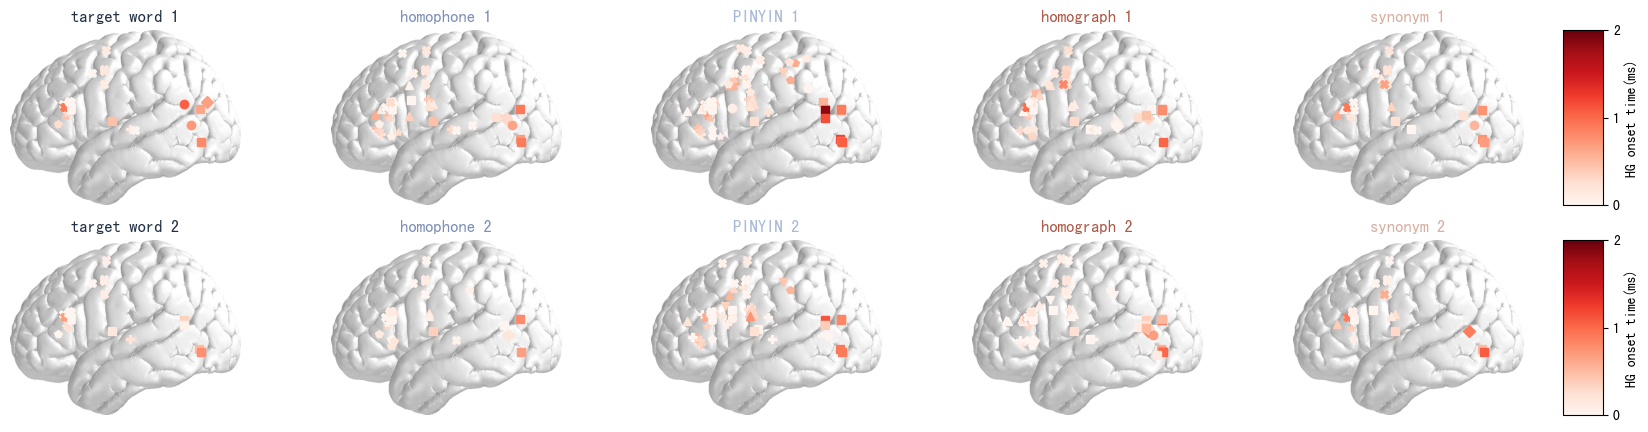

In [80]:
def add_right_cax(ax, pad, width):
    '''
    在一个ax右边追加与之等高的cax.
    pad是cax与ax的间距.
    width是cax的宽度.
    '''
    axpos = ax.get_position()
    caxpos = mpl.transforms.Bbox.from_extents(
        axpos.x1 + pad,
        axpos.y0,
        axpos.x1 + pad + width,
        axpos.y1
    )
    cax = ax.figure.add_axes(caxpos)

    return cax
mid_value = 1
max_value = 2
ERP_start_point = 100
ERP_end_point = 130
from matplotlib import cm
import matplotlib as mpl
from matplotlib.cm import ScalarMappable

def custom_cmap(value):
    cmap = cm.get_cmap('Reds')
    normalized_value = (value - 0) /( max_value-0)   
    return cmap(normalized_value)
img = mpimg.imread(path +"/elecs/Brain2D/MNI152_brain2D.png")
check_list_2 = ['树叶','数页','shù yè','对十','绿草']
check_list_1 = ['功课','宫客','gōng kè','力果','作业']
color_list = [(32/255,48/255,69/255),(125/255,144/255,184/255),(166/255,185/255,215/255),(174/255,88/255,69/255),(216/255,174/255,160/255)]
fig, axes = plt.subplots(2,5,figsize=(20,5))
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
for pic,_ in enumerate(check_list_1):
# img = np.load(path+"/elecs/Brain2D/MNI152_brain2D.png.npy")
    ax = axes[0,pic]
    ax.imshow(img)
    
    for HS in subjects:
        n_std = 5
        subject = f"HS{HS}"
        xy = scio.loadmat(path +"/elecs/All_elecs/"+ subject + "_warped_elec_pos2D.mat")['elecmatrix']
        n_chans = 256 if xy.shape[0] >= 256 else 128
        
        all_sig_elecs =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs{n_std}.npy",allow_pickle=True).item()
        all_sig_elecs_onset_offset =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs_time{n_std}.npy",allow_pickle=True).item()
        anatomy = scio.loadmat(path+f"/elecs/All_elecs/HS{HS}_elecs_all_warped.mat")['anatomy']

        z = plt.get_cmap("coolwarm")
        #plt.title("HS_"+str(HS)+": "+task+" "+str(time))
        
        task = "cue"
        for i in range(n_chans):
            if i in all_sig_elecs[check_list_1[pic]+ " "+task]:
                zscore_value = np.mean(HS_BLOCK[f"HS{HS}"][check_list_1[pic]][i,ERP_start_point:ERP_end_point,:])
                    #对皮尔森相似度正的为红色，负的为蓝色,不显著的为绿色, 不显著的电极为灰色
                #if offset<100:
                ax.plot(xy[i][0], xy[i][1],color = custom_cmap(zscore_value),alpha =1,marker=marker_type[str(HS)])
        ax.grid('off') 
        ax.axis('off')
        ax.set_title(name_list[pic]+" 1",color = color_list[pic])


ax = axes[0,4]
sm = ScalarMappable(cmap='Reds')
sm.set_clim(0, max_value)  # 设置最小值和最大值
cax = add_right_cax(ax, pad=0.02, width=0.02)
cbar = fig.colorbar(sm, cax=cax,ticks=[0,mid_value, max_value])
cbar.set_label('HG zscore value')
for pic,_ in enumerate(check_list_2):
# img = np.load(path+"/elecs/Brain2D/MNI152_brain2D.png.npy")
    ax = axes[1,pic]
    ax.imshow(img)
    
    for HS in subjects:
        n_std = 5
        subject = f"HS{HS}"
        xy = scio.loadmat(path +"/elecs/All_elecs/"+ subject + "_warped_elec_pos2D.mat")['elecmatrix']
        n_chans = 256 if xy.shape[0] >= 256 else 128
        
        all_sig_elecs =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs{n_std}.npy",allow_pickle=True).item()
        all_sig_elecs_onset_offset =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs_time{n_std}.npy",allow_pickle=True).item()
        anatomy = scio.loadmat(path+f"/elecs/All_elecs/HS{HS}_elecs_all_warped.mat")['anatomy']

        z = plt.get_cmap("coolwarm")
        #plt.title("HS_"+str(HS)+": "+task+" "+str(time))
        
        task = "cue"
        for i in range(n_chans):
            if i in all_sig_elecs[check_list_2[pic]+ " "+task]:
                zscore_value = np.mean(HS_BLOCK[f"HS{HS}"][check_list_2[pic]][i,ERP_start_point:ERP_end_point,:])

                ax.plot(xy[i][0], xy[i][1],color = custom_cmap(zscore_value),alpha =1,marker=marker_type[str(HS)])
        ax.grid('off') 
        ax.axis('off')
        ax.set_title(name_list[pic]+" 2",color = color_list[pic])   

ax = axes[1,4]
sm = ScalarMappable(cmap='Reds')
sm.set_clim(0, max_value)  # 设置最小值和最大值
cax = add_right_cax(ax, pad=0.02, width=0.02)
cbar = fig.colorbar(sm, cax=cax,ticks=[0,mid_value, max_value])
cbar.set_label('HG zscore value')

## 300~500ms

/tmp/ipykernel_23492/3020070210.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')


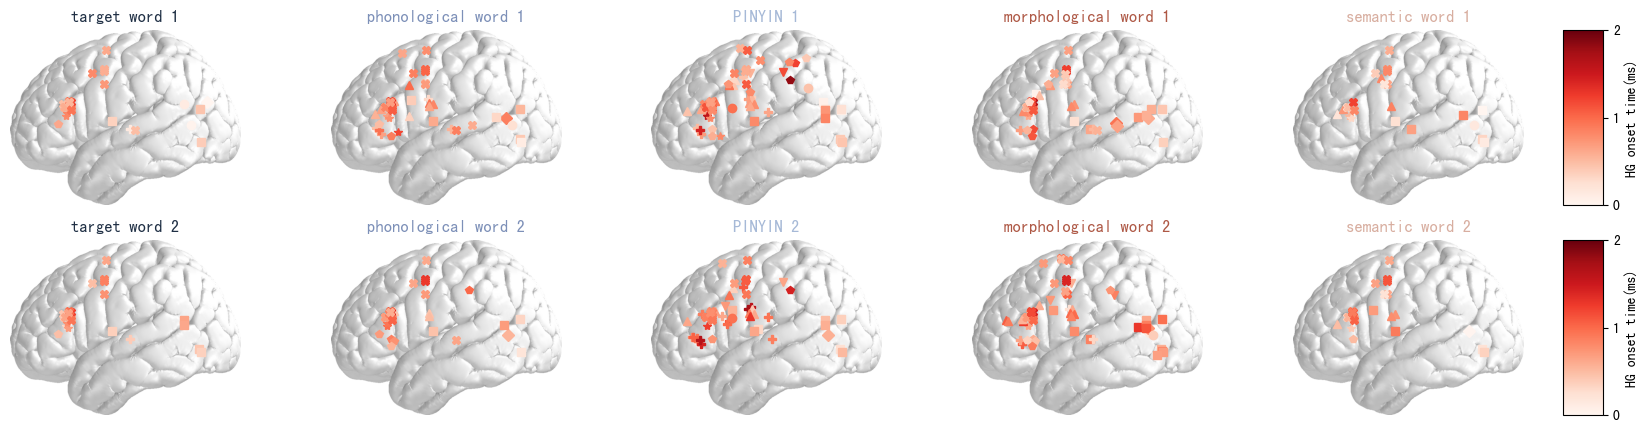

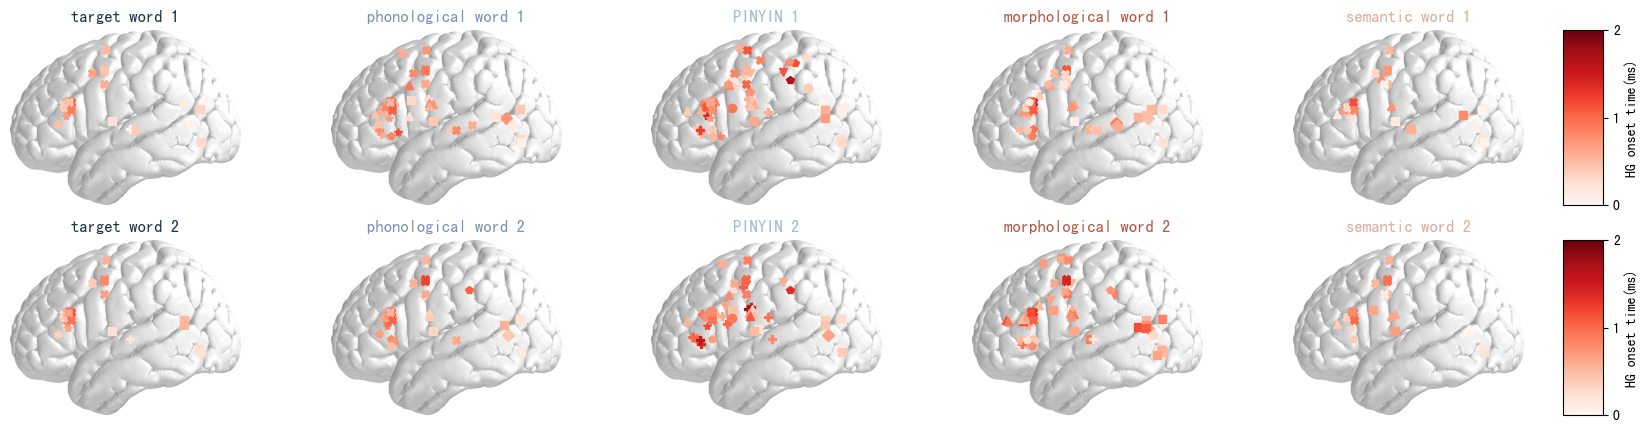

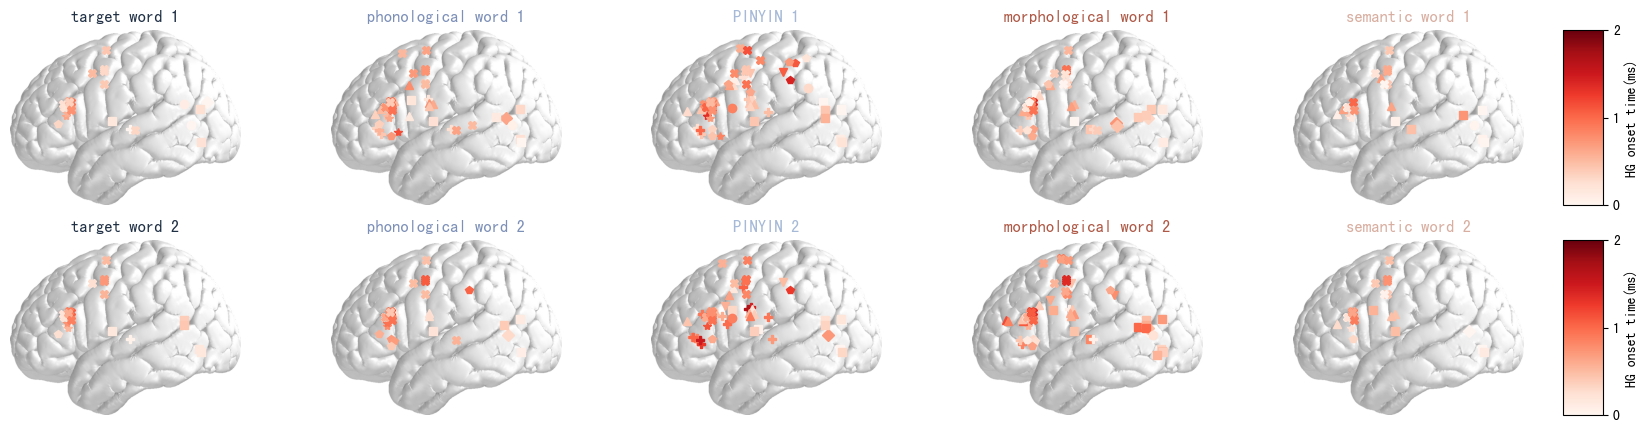

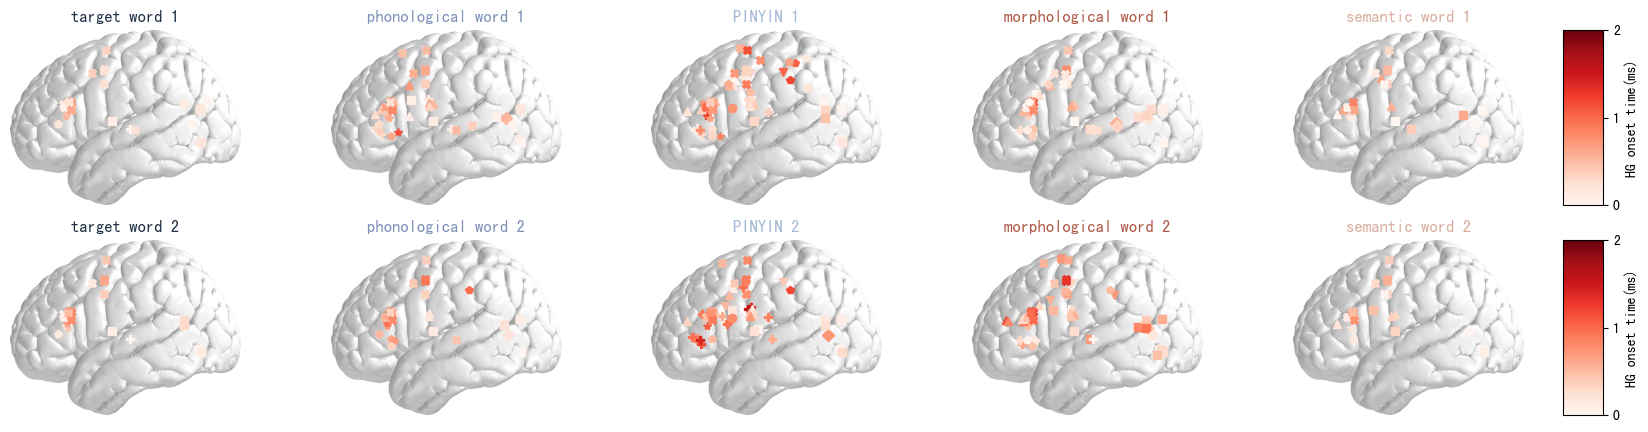

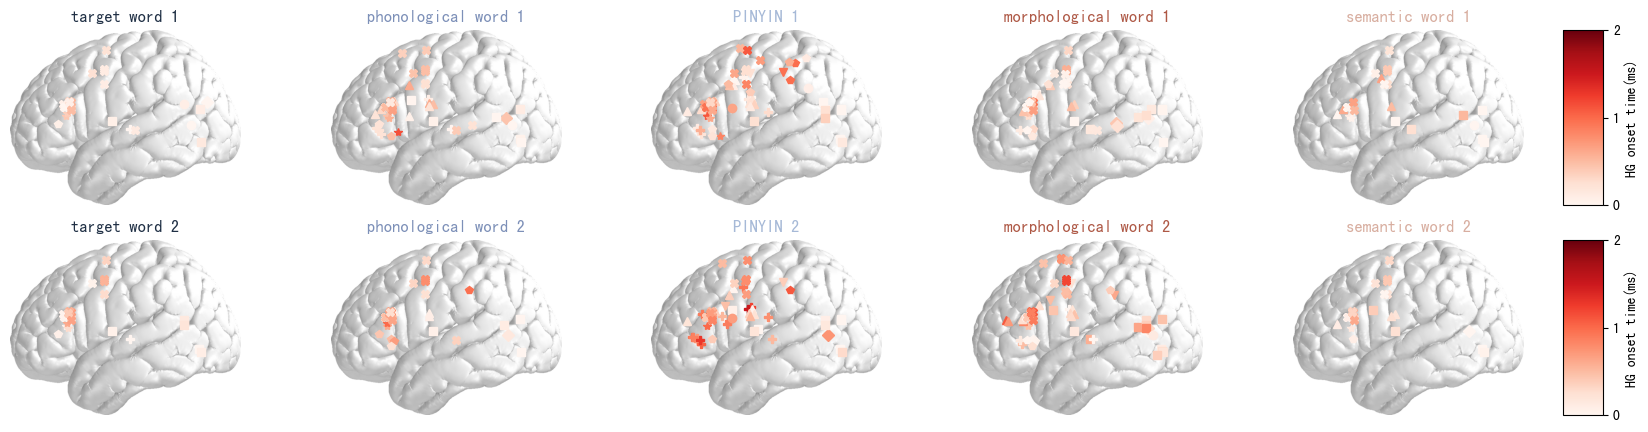

In [29]:
def add_right_cax(ax, pad, width):
    '''
    在一个ax右边追加与之等高的cax.
    pad是cax与ax的间距.
    width是cax的宽度.
    '''
    axpos = ax.get_position()
    caxpos = mpl.transforms.Bbox.from_extents(
        axpos.x1 + pad,
        axpos.y0,
        axpos.x1 + pad + width,
        axpos.y1
    )
    cax = ax.figure.add_axes(caxpos)

    return cax

from matplotlib import cm
import matplotlib as mpl
from matplotlib.cm import ScalarMappable

def custom_cmap(value):
    cmap = cm.get_cmap('Reds')
    normalized_value = (value - 0) /( max_value-0)   
    return cmap(normalized_value)
def plot_mean_erp(mid_value = 1,
max_value = 2,
ERP_start_point = 130,
ERP_end_point = 135,):


    img = mpimg.imread(path +"/elecs/Brain2D/MNI152_brain2D.png")
    check_list_2 = ['树叶','数页','shù yè','对十','绿草']
    check_list_1 = ['功课','宫客','gōng kè','力果','作业']
    color_list = [(32/255,48/255,69/255),(125/255,144/255,184/255),(166/255,185/255,215/255),(174/255,88/255,69/255),(216/255,174/255,160/255)]
    fig, axes = plt.subplots(2,5,figsize=(20,5))
    matplotlib.rcParams['font.sans-serif'] = ['SimHei']
    for pic,_ in enumerate(check_list_1):
    # img = np.load(path+"/elecs/Brain2D/MNI152_brain2D.png.npy")
        ax = axes[0,pic]
        ax.imshow(img)
        
        for HS in subjects:
            n_std = 5
            subject = f"HS{HS}"
            xy = scio.loadmat(path +"/elecs/All_elecs/"+ subject + "_warped_elec_pos2D.mat")['elecmatrix']
            n_chans = 256 if xy.shape[0] >= 256 else 128
            
            all_sig_elecs =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs{n_std}.npy",allow_pickle=True).item()
            all_sig_elecs_onset_offset =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs_time{n_std}.npy",allow_pickle=True).item()
            anatomy = scio.loadmat(path+f"/elecs/All_elecs/HS{HS}_elecs_all_warped.mat")['anatomy']

            z = plt.get_cmap("coolwarm")
            #plt.title("HS_"+str(HS)+": "+task+" "+str(time))
            
            task = "cue"
            for i in range(n_chans):
                if i in all_sig_elecs[check_list_1[pic]+ " "+task]:
                    zscore_value = np.mean(HS_BLOCK[f"HS{HS}"][check_list_1[pic]][i,ERP_start_point:ERP_end_point,:])
                        #对皮尔森相似度正的为红色，负的为蓝色,不显著的为绿色, 不显著的电极为灰色
                    #if offset<100:
                    ax.plot(xy[i][0], xy[i][1],color = custom_cmap(zscore_value),alpha =1,marker=marker_type[str(HS)])
            ax.grid('off') 
            ax.axis('off')
            ax.set_title(name_list[pic]+" 1",color = color_list[pic])


    ax = axes[0,4]
    sm = ScalarMappable(cmap='Reds')
    sm.set_clim(0, max_value)  # 设置最小值和最大值
    cax = add_right_cax(ax, pad=0.02, width=0.02)
    cbar = fig.colorbar(sm, cax=cax,ticks=[0,mid_value, max_value])
    cbar.set_label('HG onset time(ms)')
    for pic,_ in enumerate(check_list_2):
    # img = np.load(path+"/elecs/Brain2D/MNI152_brain2D.png.npy")
        ax = axes[1,pic]
        ax.imshow(img)
        
        for HS in subjects:
            n_std = 5
            subject = f"HS{HS}"
            xy = scio.loadmat(path +"/elecs/All_elecs/"+ subject + "_warped_elec_pos2D.mat")['elecmatrix']
            n_chans = 256 if xy.shape[0] >= 256 else 128
            
            all_sig_elecs =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs{n_std}.npy",allow_pickle=True).item()
            all_sig_elecs_onset_offset =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs_time{n_std}.npy",allow_pickle=True).item()
            anatomy = scio.loadmat(path+f"/elecs/All_elecs/HS{HS}_elecs_all_warped.mat")['anatomy']

            z = plt.get_cmap("coolwarm")
            #plt.title("HS_"+str(HS)+": "+task+" "+str(time))
            
            task = "cue"
            for i in range(n_chans):
                if i in all_sig_elecs[check_list_2[pic]+ " "+task]:
                    zscore_value = np.mean(HS_BLOCK[f"HS{HS}"][check_list_2[pic]][i,ERP_start_point:ERP_end_point,:])

                    ax.plot(xy[i][0], xy[i][1],color = custom_cmap(zscore_value),alpha =1,marker=marker_type[str(HS)])
            ax.grid('off') 
            ax.axis('off')
            ax.set_title(name_list[pic]+" 2",color = color_list[pic])   

    ax = axes[1,4]
    sm = ScalarMappable(cmap='Reds')
    sm.set_clim(0, max_value)  # 设置最小值和最大值
    cax = add_right_cax(ax, pad=0.02, width=0.02)
    cbar = fig.colorbar(sm, cax=cax,ticks=[0,mid_value, max_value])
    cbar.set_label('HG onset time(ms)')
for i in [130,135,140,145,150]:
    plot_mean_erp(ERP_start_point=i,ERP_end_point=i+50)

## 500~700ms

/tmp/ipykernel_34606/1759546336.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')


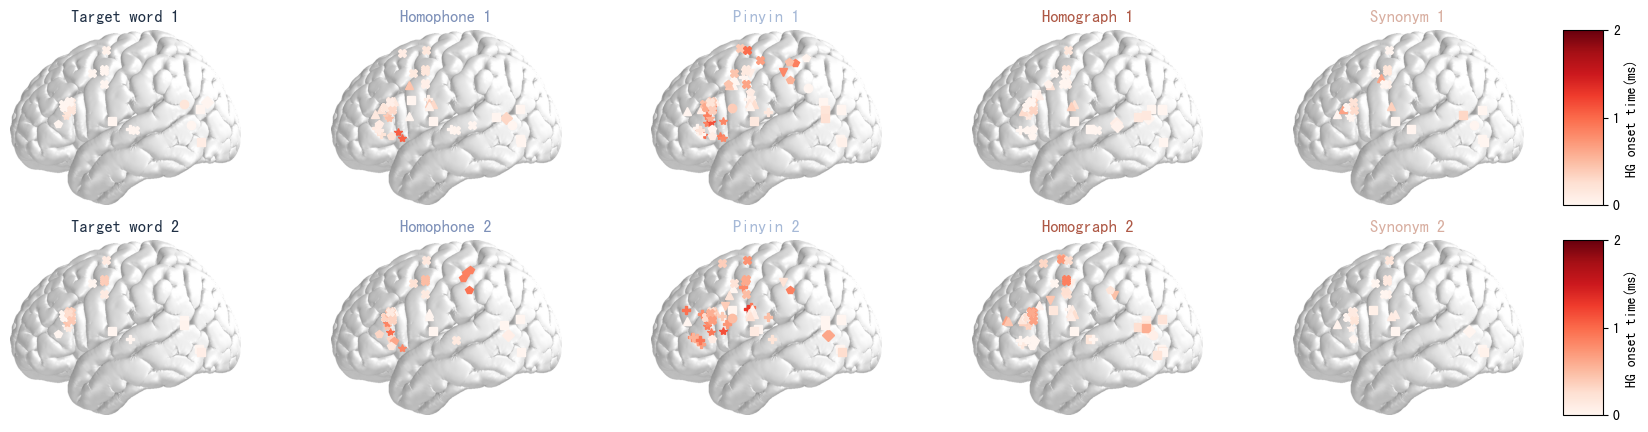

In [77]:
def add_right_cax(ax, pad, width):
    '''
    在一个ax右边追加与之等高的cax.
    pad是cax与ax的间距.
    width是cax的宽度.
    '''
    axpos = ax.get_position()
    caxpos = mpl.transforms.Bbox.from_extents(
        axpos.x1 + pad,
        axpos.y0,
        axpos.x1 + pad + width,
        axpos.y1
    )
    cax = ax.figure.add_axes(caxpos)

    return cax
mid_value = 1
max_value = 2
ERP_start_point = 170
ERP_end_point = 200
from matplotlib import cm
import matplotlib as mpl
from matplotlib.cm import ScalarMappable

def custom_cmap(value):
    cmap = cm.get_cmap('Reds')
    normalized_value = (value - 0) /( max_value-0)   
    return cmap(normalized_value)
img = mpimg.imread(path +"/elecs/Brain2D/MNI152_brain2D.png")
check_list_2 = ['树叶','数页','shù yè','对十','绿草']
check_list_1 = ['功课','宫客','gōng kè','力果','作业']
color_list = [(32/255,48/255,69/255),(125/255,144/255,184/255),(166/255,185/255,215/255),(174/255,88/255,69/255),(216/255,174/255,160/255)]
fig, axes = plt.subplots(2,5,figsize=(20,5))
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
for pic,_ in enumerate(check_list_1):
# img = np.load(path+"/elecs/Brain2D/MNI152_brain2D.png.npy")
    ax = axes[0,pic]
    ax.imshow(img)
    
    for HS in subjects:
        n_std = 5
        subject = f"HS{HS}"
        xy = scio.loadmat(path +"/elecs/All_elecs/"+ subject + "_warped_elec_pos2D.mat")['elecmatrix']
        n_chans = 256 if xy.shape[0] >= 256 else 128
        
        all_sig_elecs =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs{n_std}.npy",allow_pickle=True).item()
        all_sig_elecs_onset_offset =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs_time{n_std}.npy",allow_pickle=True).item()
        anatomy = scio.loadmat(path+f"/elecs/All_elecs/HS{HS}_elecs_all_warped.mat")['anatomy']

        z = plt.get_cmap("coolwarm")
        #plt.title("HS_"+str(HS)+": "+task+" "+str(time))
        
        task = "cue"
        for i in range(n_chans):
            if i in all_sig_elecs[check_list_1[pic]+ " "+task]:
                zscore_value = np.mean(HS_BLOCK[f"HS{HS}"][check_list_1[pic]][i,ERP_start_point:ERP_end_point,:])
                    #对皮尔森相似度正的为红色，负的为蓝色,不显著的为绿色, 不显著的电极为灰色
                #if offset<100:
                ax.plot(xy[i][0], xy[i][1],color = custom_cmap(zscore_value),alpha =1,marker=marker_type[str(HS)])
        ax.grid('off') 
        ax.axis('off')
        ax.set_title(name_list[pic]+" 1",color = color_list[pic])


ax = axes[0,4]
sm = ScalarMappable(cmap='Reds')
sm.set_clim(0, max_value)  # 设置最小值和最大值
cax = add_right_cax(ax, pad=0.02, width=0.02)
cbar = fig.colorbar(sm, cax=cax,ticks=[0,mid_value, max_value])
cbar.set_label('HG onset time(ms)')
for pic,_ in enumerate(check_list_2):
# img = np.load(path+"/elecs/Brain2D/MNI152_brain2D.png.npy")
    ax = axes[1,pic]
    ax.imshow(img)
    
    for HS in subjects:
        n_std = 5
        subject = f"HS{HS}"
        xy = scio.loadmat(path +"/elecs/All_elecs/"+ subject + "_warped_elec_pos2D.mat")['elecmatrix']
        n_chans = 256 if xy.shape[0] >= 256 else 128
        
        all_sig_elecs =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs{n_std}.npy",allow_pickle=True).item()
        all_sig_elecs_onset_offset =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs_time{n_std}.npy",allow_pickle=True).item()
        anatomy = scio.loadmat(path+f"/elecs/All_elecs/HS{HS}_elecs_all_warped.mat")['anatomy']

        z = plt.get_cmap("coolwarm")
        #plt.title("HS_"+str(HS)+": "+task+" "+str(time))
        
        task = "cue"
        for i in range(n_chans):
            if i in all_sig_elecs[check_list_2[pic]+ " "+task]:
                zscore_value = np.mean(HS_BLOCK[f"HS{HS}"][check_list_2[pic]][i,ERP_start_point:ERP_end_point,:])

                ax.plot(xy[i][0], xy[i][1],color = custom_cmap(zscore_value),alpha =1,marker=marker_type[str(HS)])
        ax.grid('off') 
        ax.axis('off')
        ax.set_title(name_list[pic]+" 2",color = color_list[pic])   

ax = axes[1,4]
sm = ScalarMappable(cmap='Reds')
sm.set_clim(0, max_value)  # 设置最小值和最大值
cax = add_right_cax(ax, pad=0.02, width=0.02)
cbar = fig.colorbar(sm, cax=cax,ticks=[0,mid_value, max_value])
cbar.set_label('HG onset time(ms)')

In [54]:
all_sig_elecs["cue"]


[95, 9, 21, 77, 109, 110, 126, 212, 7, 3, 4, 195, 225, 6, 125, 244, 245, 246]

In [20]:

for pic,_ in enumerate(check_list_2):
# img = np.load(path+"/elecs/Brain2D/MNI152_brain2D.png.npy")
    ax = axes[pic]
    ax.imshow(img)
    
    for HS in subjects:
        n_std = 5
        subject = f"HS{HS}"
        xy = scio.loadmat(path +"/elecs/All_elecs/"+ subject + "_warped_elec_pos2D.mat")['elecmatrix']
        n_chans = 256 if xy.shape[0] >= 256 else 128
        
        all_sig_elecs =np.load(path +f"/elecs/sig_elecs/HS{HS}_sig_elecs{n_std}.npy",allow_pickle=True).item()
        anatomy = scio.loadmat(path+f"/elecs/All_elecs/HS{HS}_elecs_all_warped.mat")['anatomy']

        z = plt.get_cmap("coolwarm")
        #plt.title("HS_"+str(HS)+": "+task+" "+str(time))
        
        task = "cue"
        for i in range(n_chans):
            if i in all_sig_elecs[check_list_1[pic]+ " "+task] or i in all_sig_elecs[check_list_2[pic]+ " "+task]:
                color = color_set_region[anatomy[i][3][0]]
                    #对皮尔森相似度正的为红色，负的为蓝色,不显著的为绿色, 不显著的电极为灰色
                ax.plot(xy[i][0], xy[i][1], 'o',color = color,alpha =1)
        ax.grid('off') 
        ax.axis('off')
        ax.set_title(name_list[pic],color = color_list[pic])   


NameError: name 'check_list_2' is not defined